In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point
import folium
from IPython.display import IFrame
import webbrowser

In [17]:
# Set options to show all columns
pd.set_option('display.max_columns', None)

# Load csv file and generate pandas dataframe
input_csv = r'..\data\clean\after_step_3b_outliers_cat.csv' # Fill your path to file
df_1 = pd.read_csv(input_csv, sep = ',')

df_1.head()

id   locality_name  Postal_code   Price Subtype  Number_of_bedrooms  \
0  20252354           Ronse         9600  319000   House                   3   
1  20251003  Geraardsbergen         9500  299999   House                   3   
2  20252002        Mechelen         2800  275000   House                   3   
3  20252352           Gooik         1755  295000   House                   3   
4  20251715         Dilbeek         1700  715000   House                   3   

   Living_area                  street number   latitude  longitude  \
0          125                Rotterij    148  50.744176   3.625722   
1          167             Pirrestraat     17  50.752121   3.925495   
2          154        Caputsteenstraat    150  51.033269   4.491795   
3          172         Strijlandstraat     45  50.791877   4.084293   
4          280  Herdebeekstraat 94-94A      0  50.840610   4.228425   

   Open_fire  Swimming_Pool  hasTerrace  terraceSurface  gardenSurface  \
0          0              0           1               0            370   
1          0              0           1               0            895   
2          0              0           1              10             20   
3          0              0           1               0            300   
4          0              1           1              36            374   

    Kitchen_type  Number_of_facades State_of_building  Furnished epc  \
0      Installed                  4       To renovate          0   F   
1      Installed                  2              Good          0   D   
2  Semi equipped                  2       To renovate          0   E   
3      Installed                  3       To renovate          0   F   
4      Installed                  3            As new          0   C   

   landSurface  price_per_sqm  price_per_sqm_land        Province  \
0        767.0    2552.000000          415.906128   East Flanders   
1       1050.0    1796.401198          285.713333   East Flanders   
2        120.0    1785.714286         2291.666667         Antwerp   
3        309.0    1715.116279          954.692557  Brabant_Wallon   
4        374.0    2553.571429         1911.764706  Brabant_Wallon   

  Assigned_City  Has_Assigned_City  Kitchen_type_encoded  \
0           NaN               True                     1   
1           NaN               True                     1   
2           NaN               True                     2   
3           NaN               True                     1   
4           NaN               True                     1   

   State_of_building_encoded  EPC_encoded  
0                          0            0  
1                          2            2  
2                          0            1  
3                          0            0  
4                          4            3

**Determine if two numerical datasets have a linear correlation.**
1. Pearson coefficient: A Pearson coefficient close to 1 (or -1) indicates a strong positive (or negative) linear relationship. A Pearson coefficient close to 0 indicates little to no linear relationship.
2. scatter plots
3. Pearson correlation siginificance test

Correlation Matrix:
                        Price  price_per_sqm  price_per_sqm_land  Living_area  \
Price               1.000000       0.621168            0.104772     0.535161   
price_per_sqm       0.621168       1.000000            0.259085    -0.279638   
price_per_sqm_land  0.104772       0.259085            1.000000    -0.122378   
Living_area         0.535161      -0.279638           -0.122378     1.000000   
gardenSurface       0.107278       0.031598           -0.186757     0.087224   
terraceSurface      0.061826       0.020187           -0.017527     0.051736   
Number_of_facades   0.122005       0.061492           -0.181487     0.068824   
Number_of_bedrooms  0.325052      -0.099773           -0.004028     0.520726   

                    gardenSurface  terraceSurface  Number_of_facades  \
Price                    0.107278        0.061826           0.122005   
price_per_sqm            0.031598        0.020187           0.061492   
price_per_sqm_land      -0.186757       -0

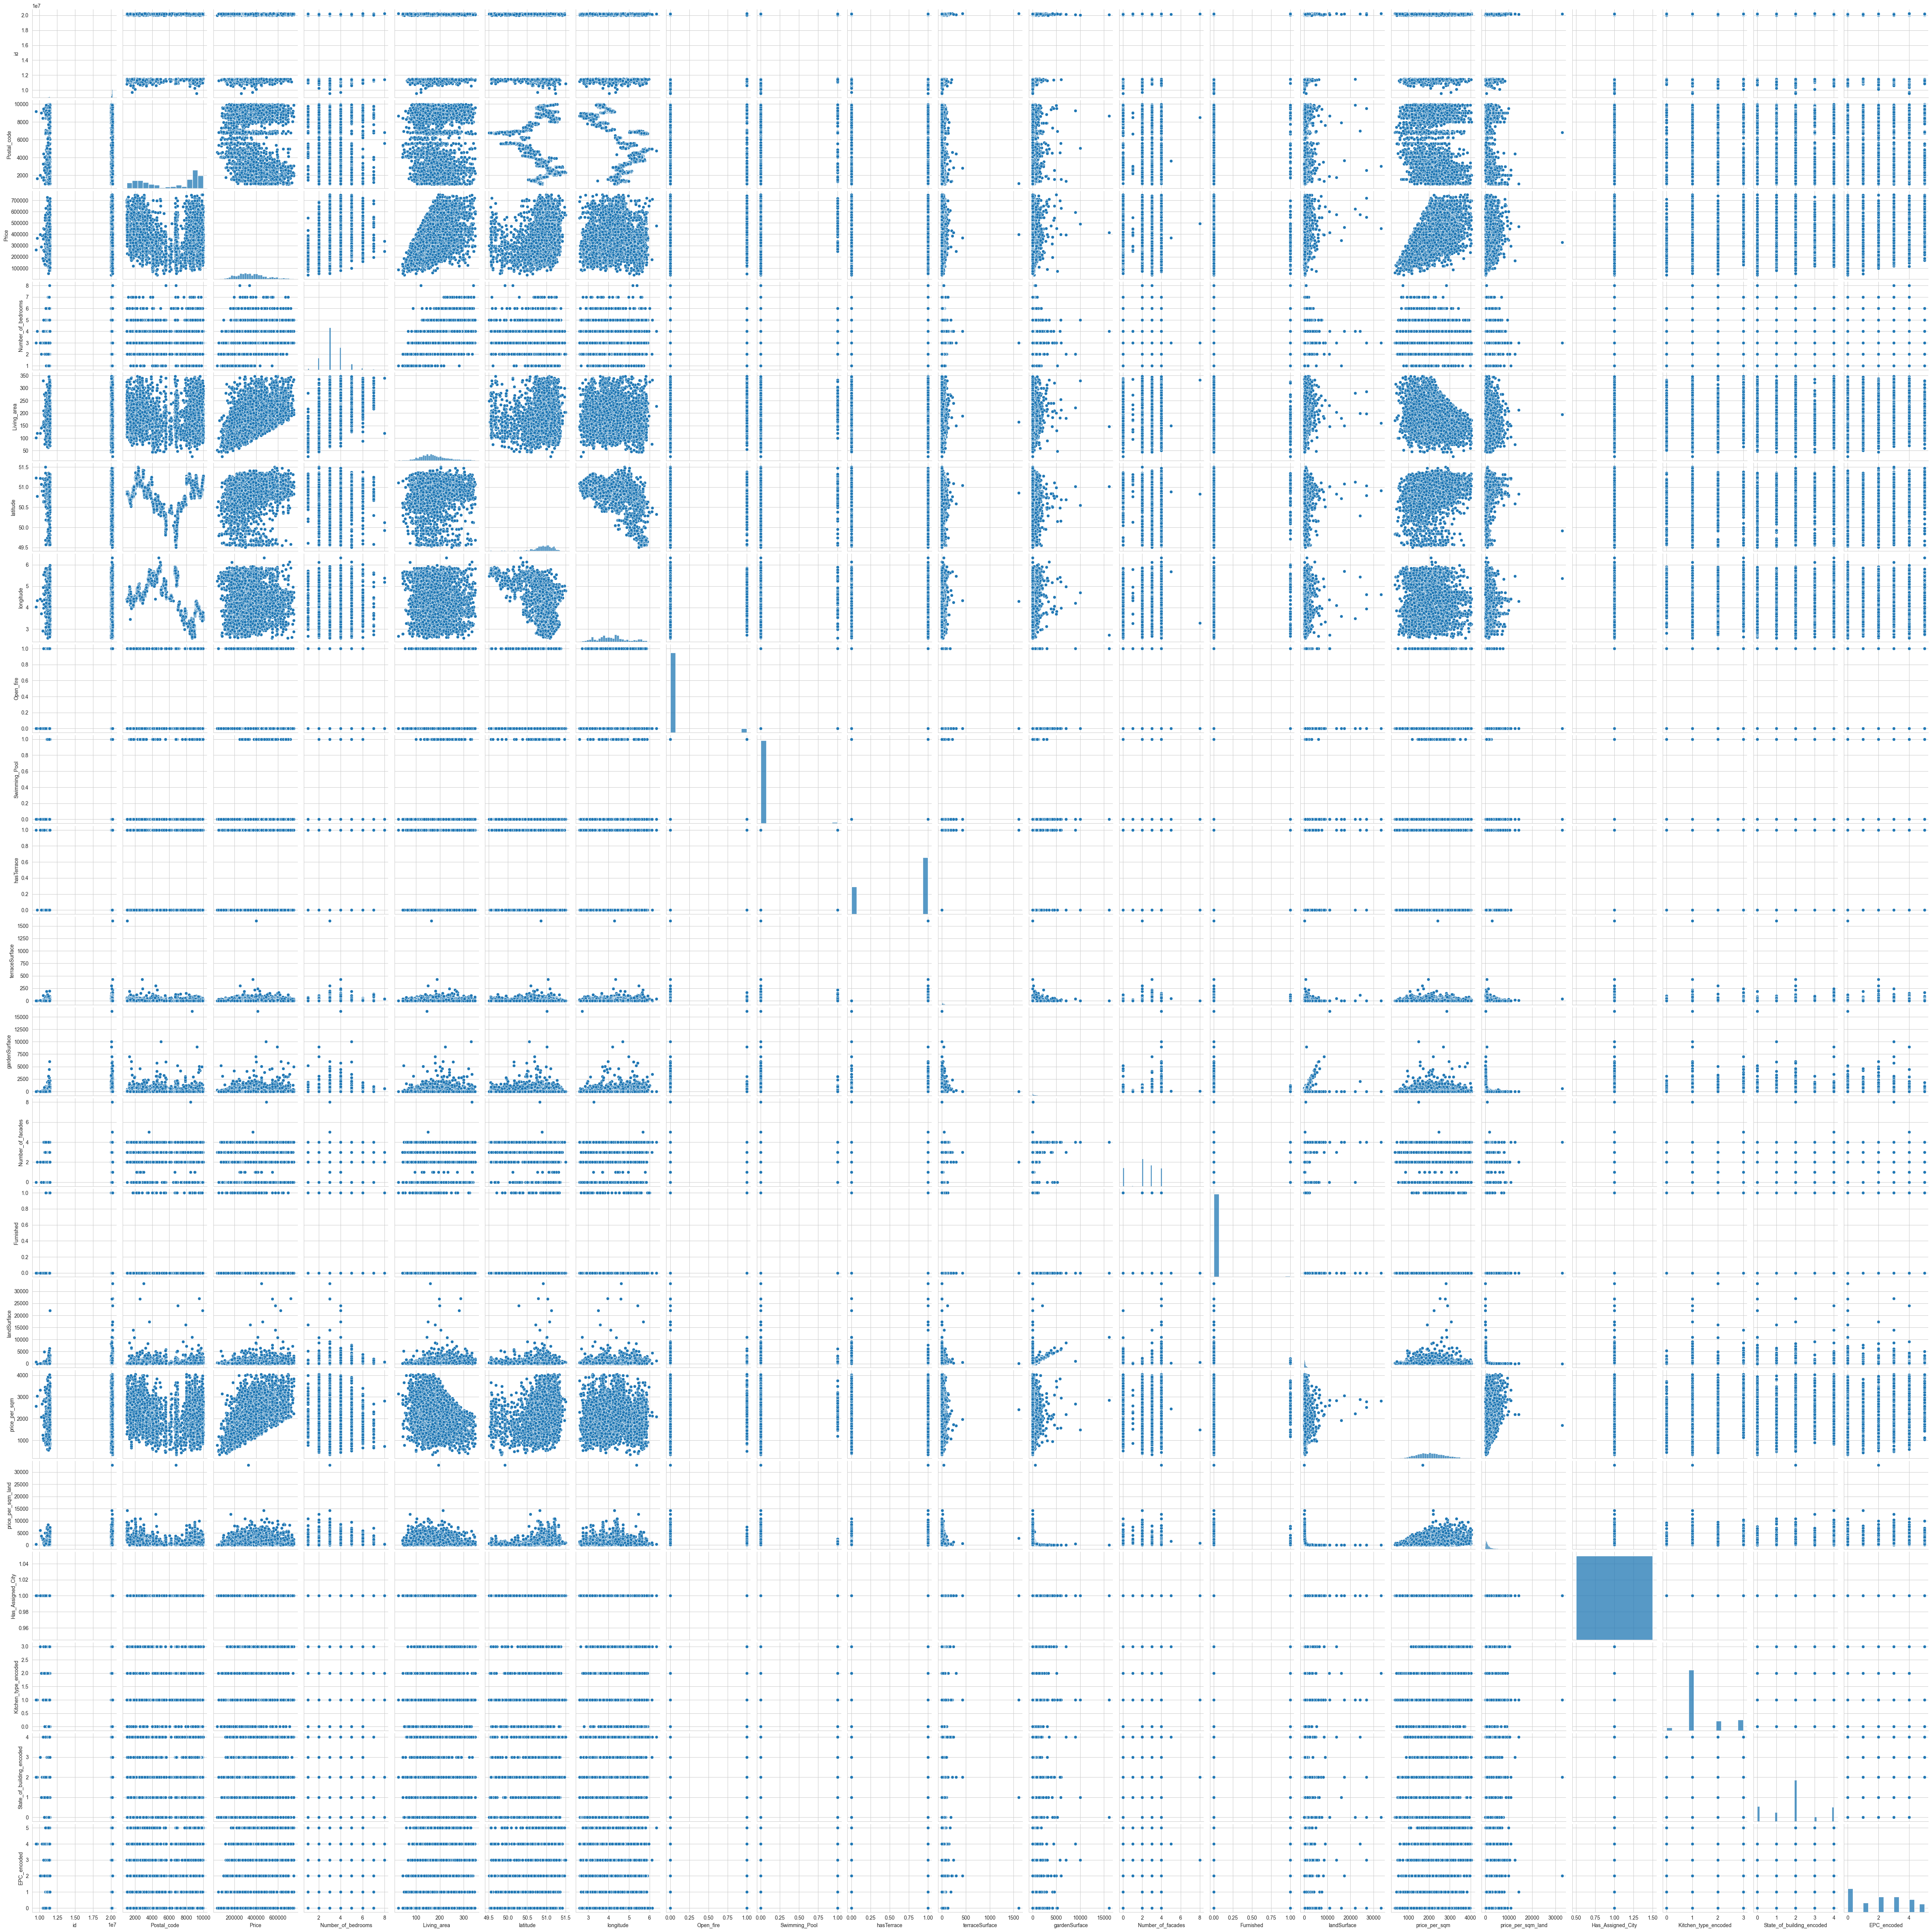

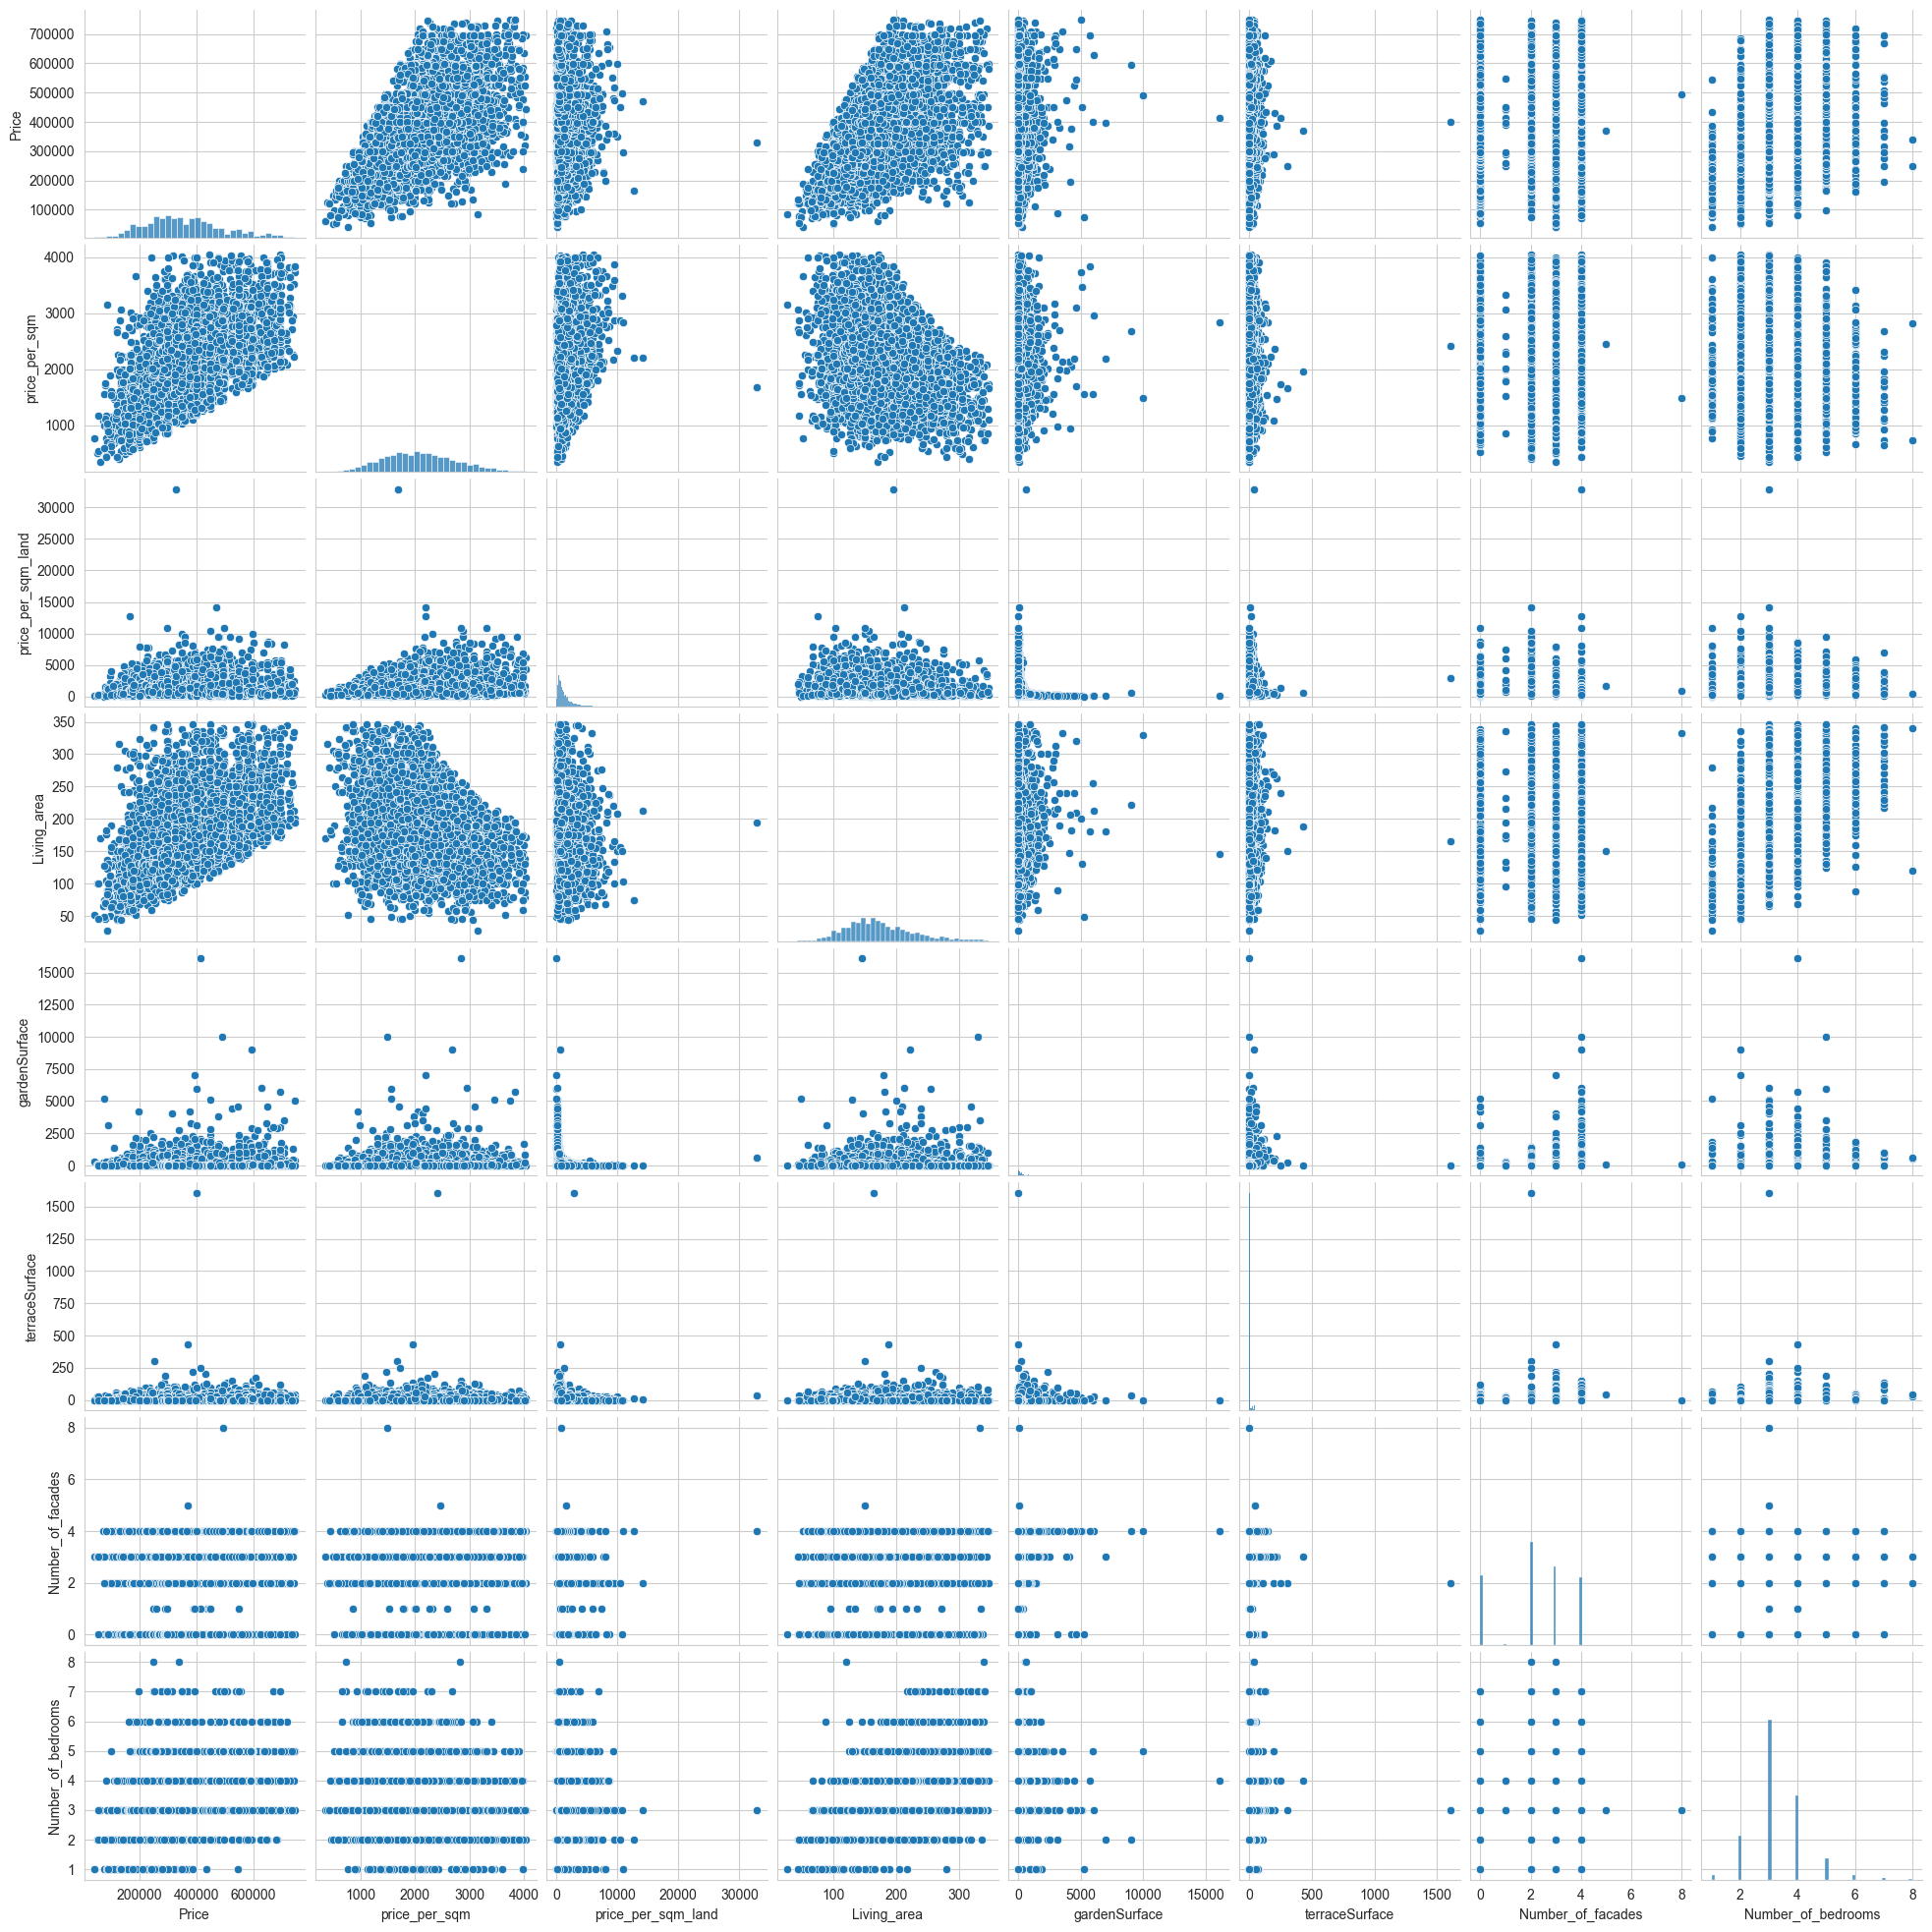

In [25]:
# Overview and grouping of the datacolumns for loop later on
num_cols = ['Price','price_per_sqm','price_per_sqm_land','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc','Postal_code','Province', 'Assigned_City']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished', 'Has_Assigned_City']

# Step 1: Calculate the Pearson correlation coefficient
correlation_matrix = df_1[num_cols].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Step 2: Visualize the relationship using scatter plots
sns.pairplot(df_1)
#cols_to_plot = ['Price','landSurface', 'Living_area','gardenSurface', 'Number_of_bedrooms', 'Number_of_facades','price_per_sqm',  'price_per_sqm_land']
sns.pairplot(df_1[num_cols])
plt.show()

**Spearman’s Correlation for non-linear correlation of data**

*non-parametric measure of monotonic relationships (relationships that are either consistently increasing or decreasing, but not necessarily in a straight line).*
- Spearman's ρ can take values from -1 to 1:
- 1: A perfect increasing monotonic relationship.
- -1: A perfect decreasing monotonic relationship.
- 0: No monotonic relationship.

*When to Use Spearman’s Rank Correlation:*
-Non-linear relationships: When you suspect the relationship between variables is monotonic but not linear.
-Ordinal data: When your data is not continuous or normally distributed (e.g., ranks, ordered categories).
-Robust to outliers: Spearman’s correlation is less sensitive to outliers because it uses rank values rather than actual data values.
*Steps for Calculating Spearman’s Correlation:*
-Rank the data: Replace the actual data values with their respective ranks.
-Calculate the differences in ranks: Compute the difference between the ranks of corresponding values from the two variables.
-Apply the Spearman’s correlation formula.

Spearman's correlation for Number_of_bedrooms versus Price
Spearman's correlation: 0.3284240345973893
P-value: 1.3907179669328172e-126
Spearman's Correlation Matrix:
 

                       Price  price_per_sqm  price_per_sqm_land  Living_area  \
Price               1.000000       0.633488            0.080553     0.536863   
price_per_sqm       0.633488       1.000000            0.243320    -0.253309   
price_per_sqm_land  0.080553       0.243320            1.000000    -0.158947   
Living_area         0.536863      -0.253309           -0.158947     1.000000   
gardenSurface       0.061583       0.047141           -0.178504     0.018433   
terraceSurface      0.085947       0.064648            0.046650     0.034039   
Number_of_facades   0.144544       0.081032           -0.357620     0.093932   
Number_of_bedrooms  0.328424      -0.080189           -0.017418     0.516285   

                    gardenSurface  terraceSurface  Number_of_facades  \
Price                    0.061583        0.085947           0.144544   
price_per_sqm            0.047141        0.064648           0.081032   
price_per_sqm_land      -0.178504        0.046650          -0.3

<Axes: >

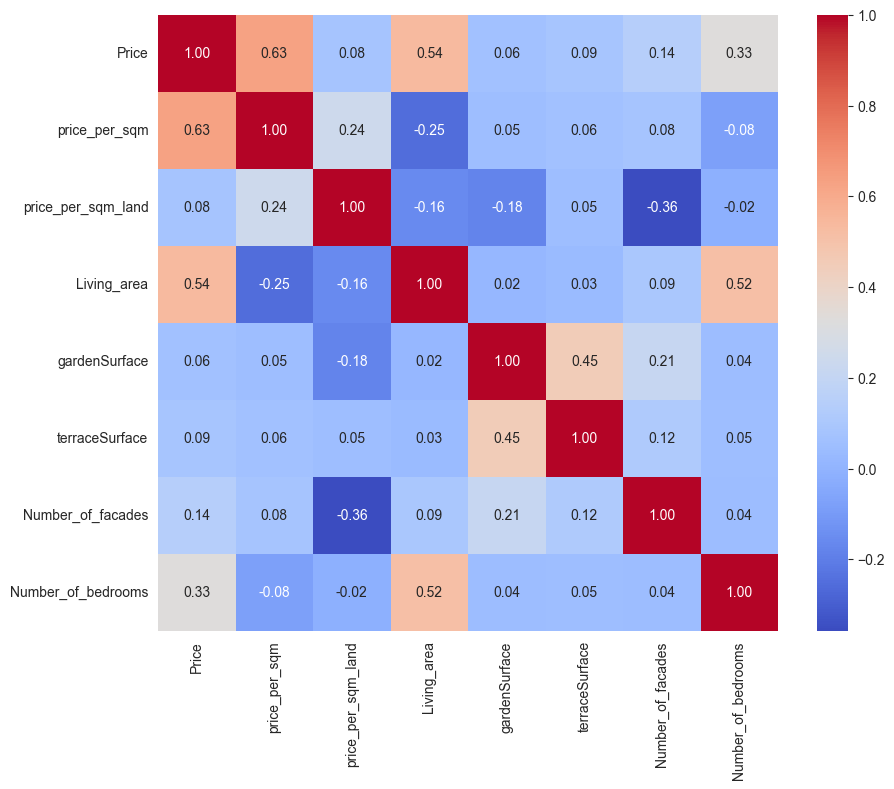

In [31]:
import pandas as pd
from scipy.stats import spearmanr

# Overview and grouping of the datacolumns for loop later on
num_cols = ['Price','price_per_sqm','price_per_sqm_land','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']

corr_list = []

# Calculate Spearman's correlation

corr, p_value = spearmanr(df_1[col], df_1['Price'])

print(f"Spearman's correlation for {col} versus Price")
print(f"Spearman's correlation: {corr}")
print(f"P-value: {p_value}")

# Step 3: Calculate correlations
# Create the Spearman's Rank Correlation matrix
spearman_corr_matrix = df_1[num_cols].corr(method='spearman')

# Display the matrix
print("Spearman's Correlation Matrix:\n", spearman_corr_matrix)

# Step 4: Create a heat map
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

**Test for pair plots**

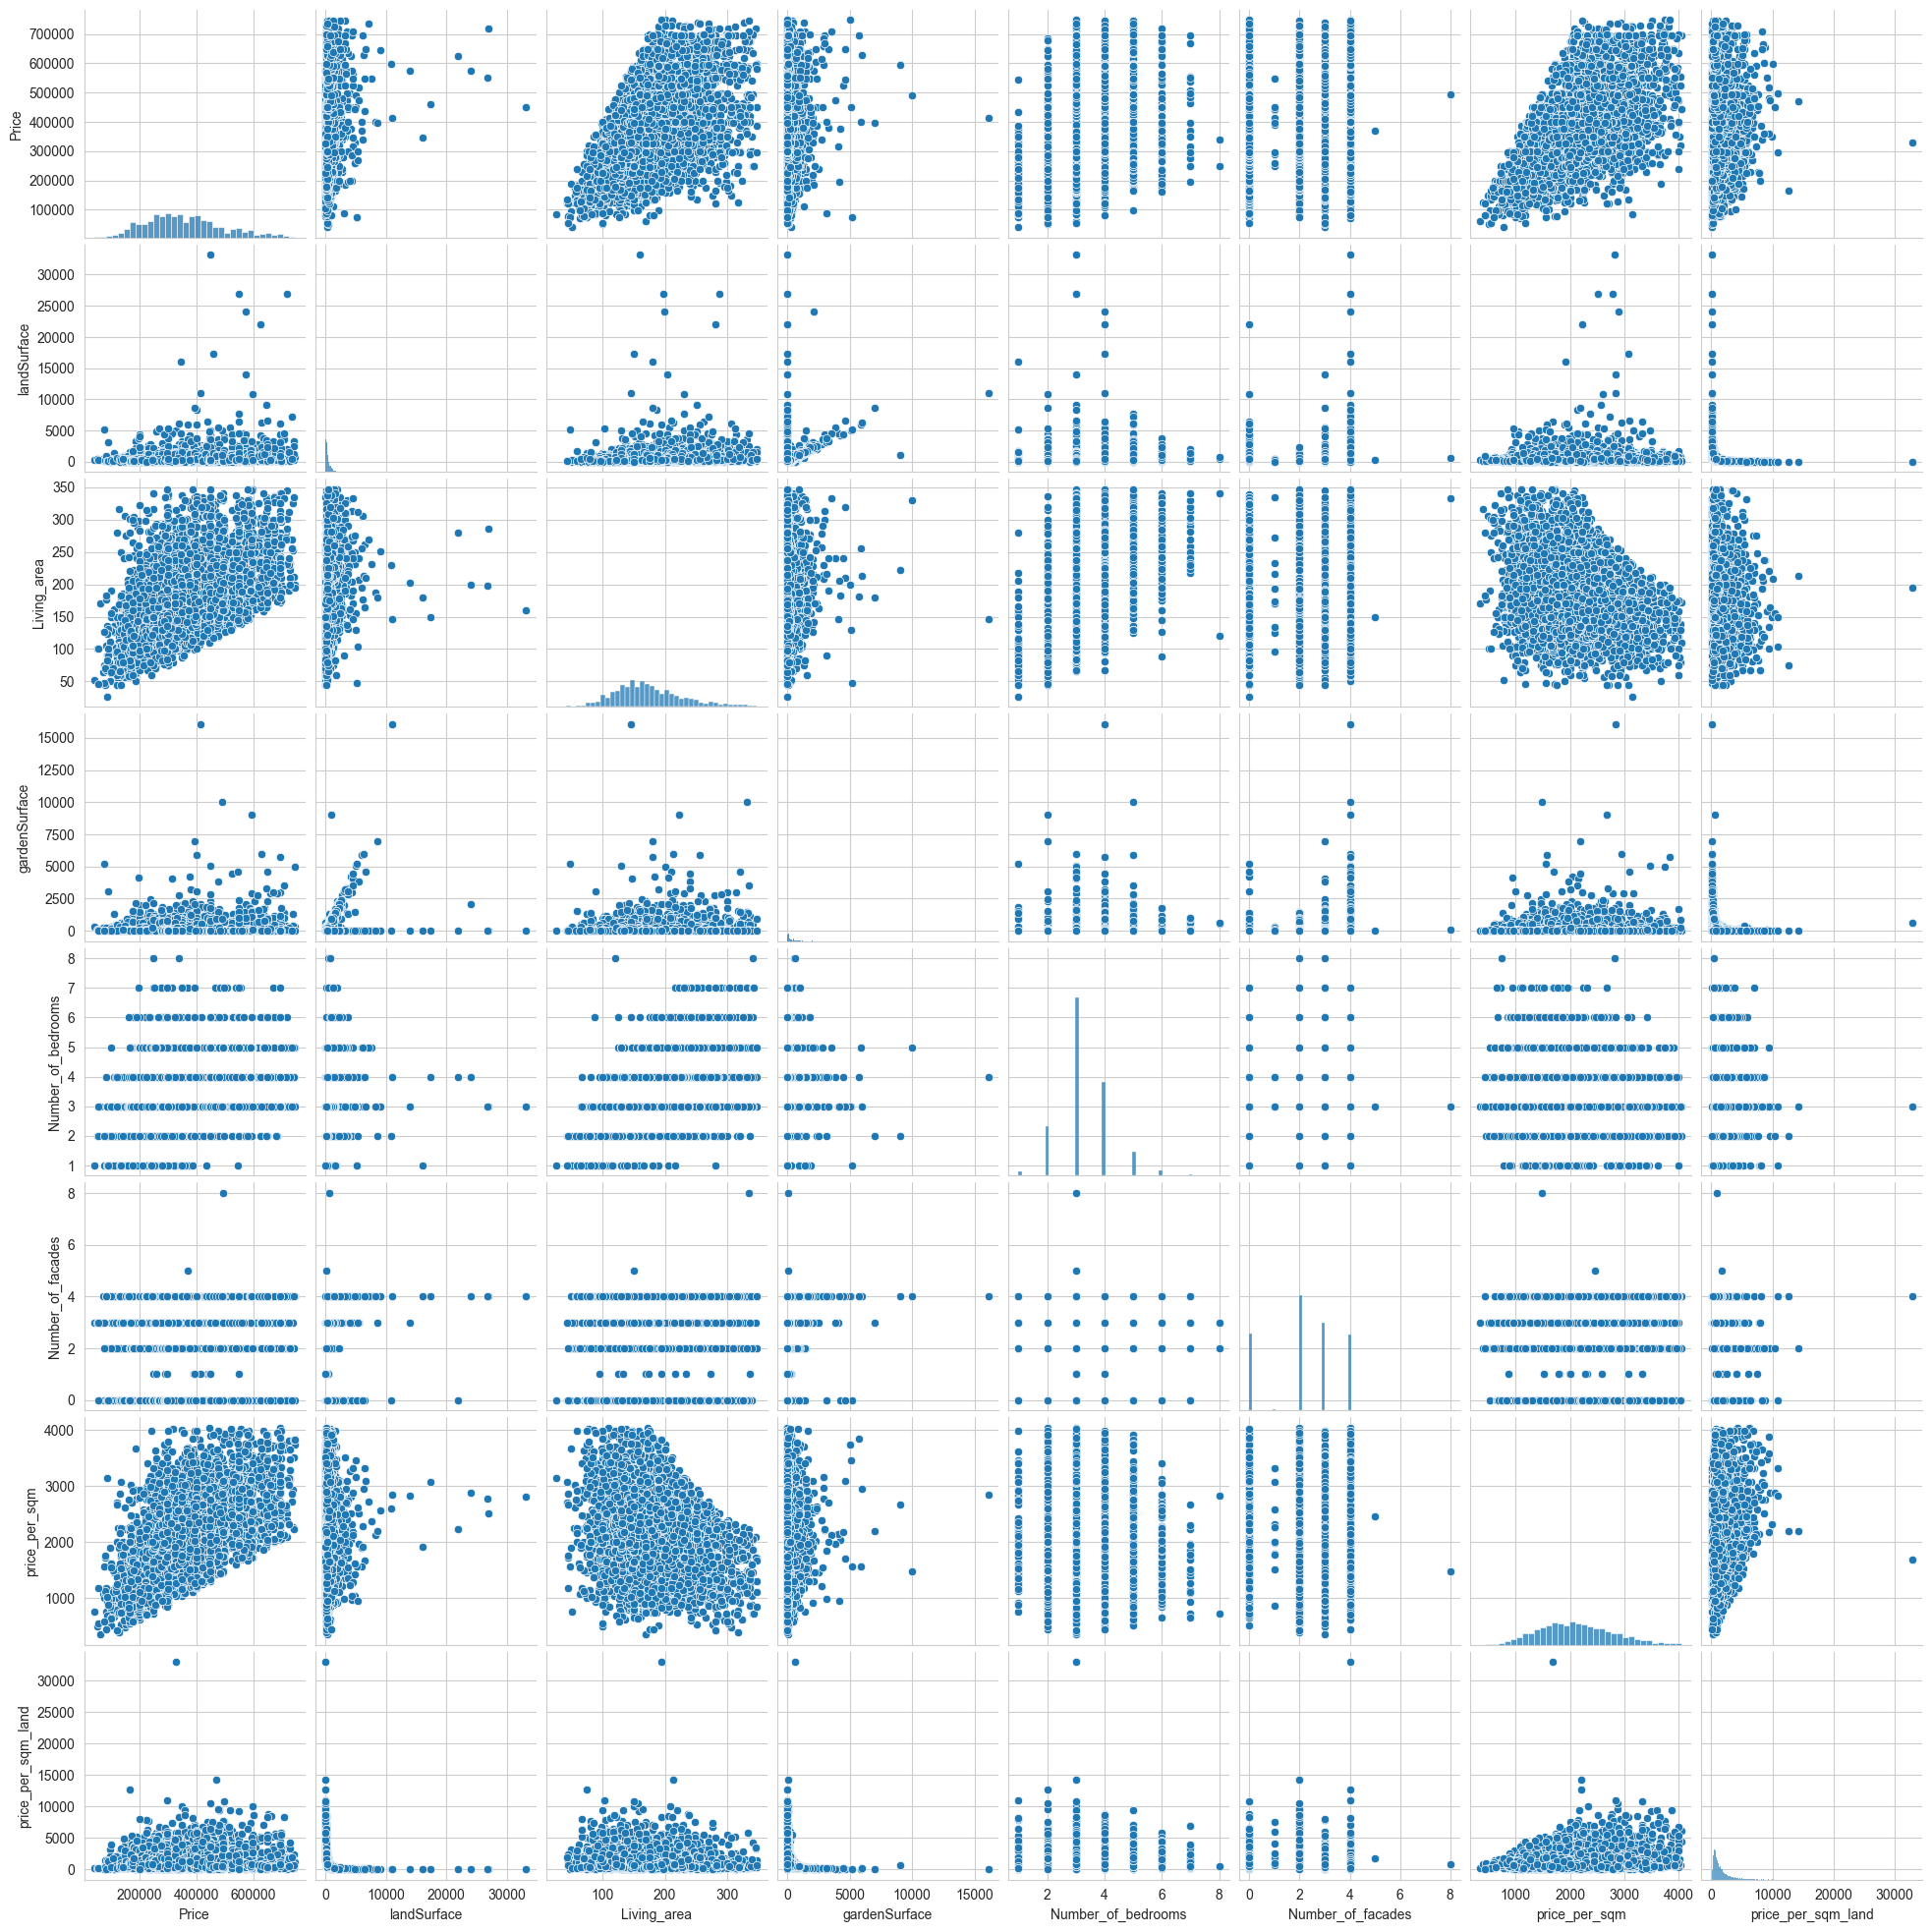

In [23]:
#cols_to_plot = ['Price', 'Subtype', 'Number_of_bedrooms', 'Living_area', 'Open_fire', 'Swimming_Pool', 'hasTerrace', 'gardenSurface' , 'Kitchen_type','Number_of_facades','State_of_building','Furnished','epc',,,'Furnished','epc',]
cols_to_plot = ['Price','landSurface', 'Living_area','gardenSurface', 'Number_of_bedrooms', 'Number_of_facades','price_per_sqm',  'price_per_sqm_land']
sns.pairplot(df_1[cols_to_plot])
plt.show()

**Test for lmplot**

c:\Users\tom_v\becode_projects\3_ImmoWeb_scraper\immo-eliza-team6-analysis\.venv\Lib\site-packages\numpy\_core\function_base.py:169: RuntimeWarning: invalid value encountered in multiply
  y *= step
c:\Users\tom_v\becode_projects\3_ImmoWeb_scraper\immo-eliza-team6-analysis\.venv\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1650: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


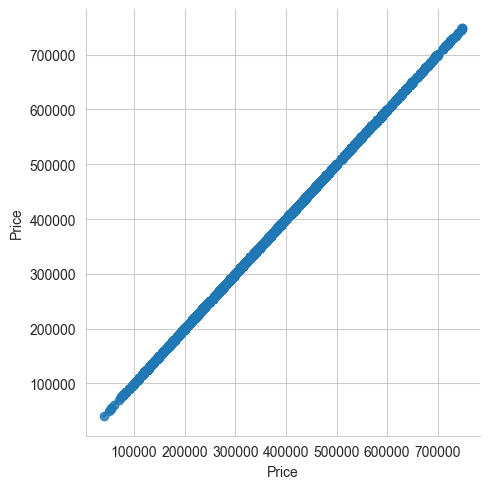

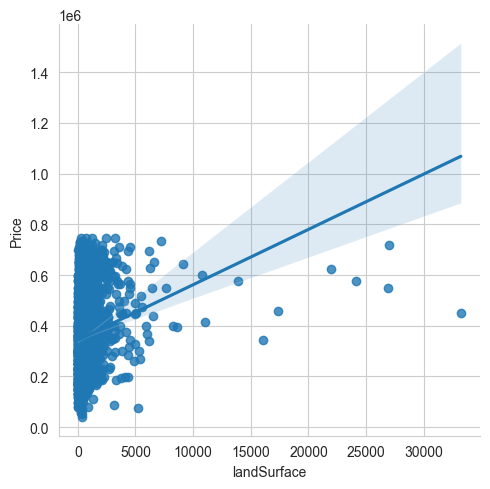

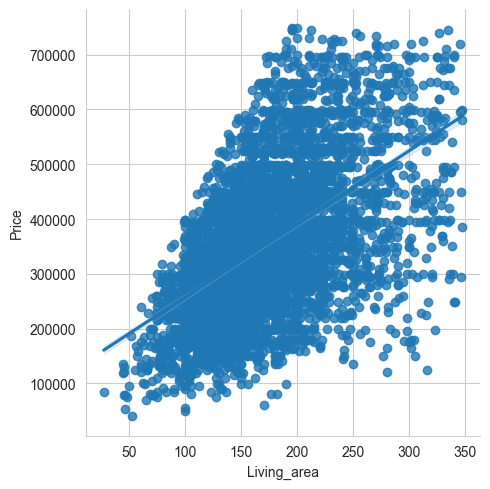

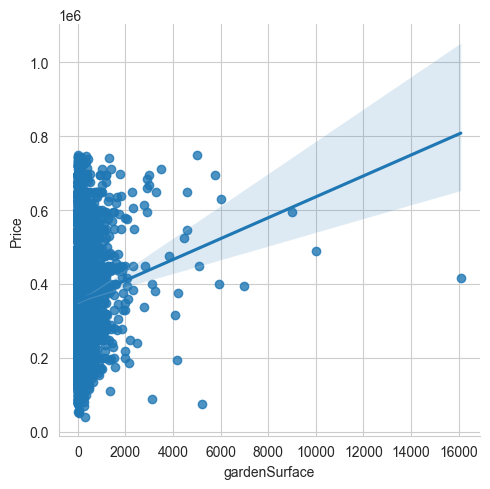

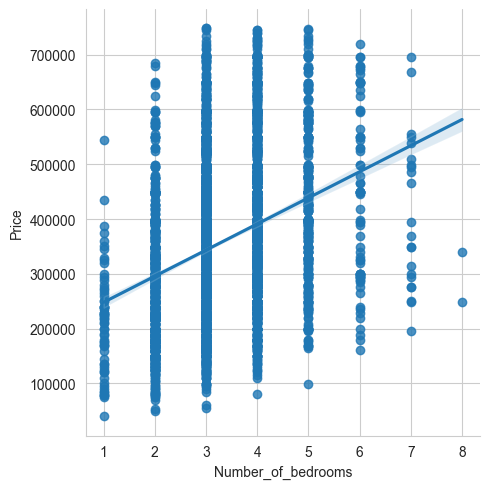

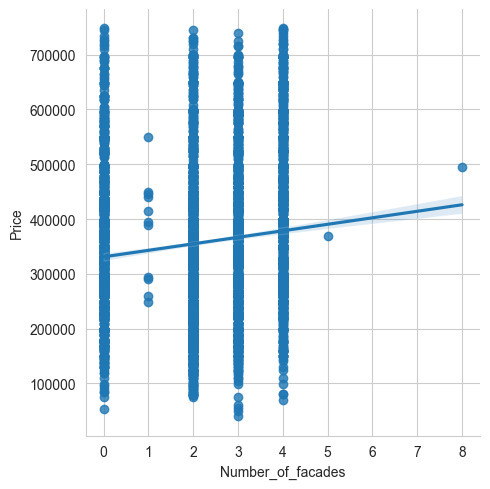

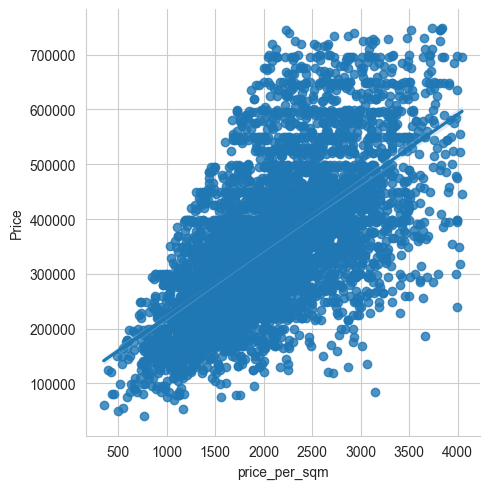

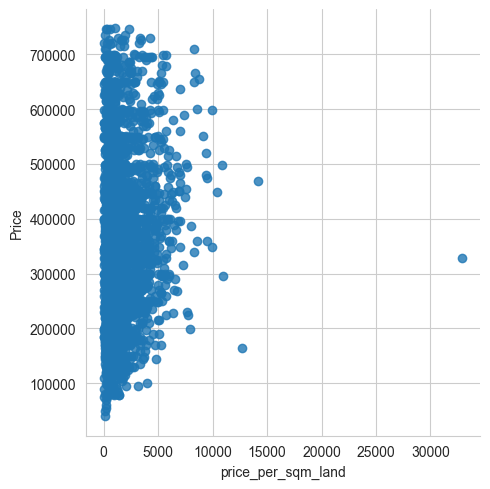

In [22]:
cols_to_plot = ['Price','landSurface', 'Living_area','gardenSurface', 'Number_of_bedrooms', 'Number_of_facades','price_per_sqm',  'price_per_sqm_land']
for col in cols_to_plot:
    sns.lmplot(data=df_1, x=col, y="Price") #col="time", hue="smoker"


### Calculation of mode for column with or without group by:

In [7]:
df['Price'].mode()

df.groupby('Subtype')['Price'].apply(lambda x: x.mode().iloc[0]).sort_values(ascending=False)


Subtype
House    399000
Name: Price, dtype: int64

### Calculation of skew, mean, median via agg function, for whole column or with a groupby subdivision

In [8]:
columns = ['Price','price_per_sqm','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']
group = 'Subtype'
for col in columns:
    print(df[col].agg(['skew','mean','median']))
    print(df[col].mode().iloc[0])

for col in columns:
    print(df.groupby(group)[col].agg(['skew','mean','median']))
    print(df.groupby(group)[col].apply(lambda x: x.mode().iloc[0]))
          
#df2.groupby(group)['Price'].agg(['skew','mean','median'])

skew           0.486160
mean      357524.657439
median    349000.000000
Name: Price, dtype: float64
399000
skew         0.281942
mean      2106.748201
median    2061.452514
Name: price_per_sqm, dtype: float64
2500.0
skew        0.654532
mean      174.575184
median    167.000000
Name: Living_area, dtype: float64
150
skew       12.155938
mean      160.648277
median      0.000000
Name: gardenSurface, dtype: float64
0
skew      32.717120
mean       9.341167
median     0.000000
Name: terraceSurface, dtype: float64
0
skew     -0.422164
mean      2.237403
median    2.000000
Name: Number_of_facades, dtype: float64
2
skew      0.648705
mean      3.297351
median    3.000000
Name: Number_of_bedrooms, dtype: float64
3
            skew           mean    median
Subtype                                  
House    0.48616  357524.657439  349000.0
Subtype
House    399000
Name: Price, dtype: int64
             skew         mean       median
Subtype                                    
House    0.281942  2

#### Loops to catch skewed numerical data, as such or using subdivision in groups of categorical data and bool data --> list

In [9]:
num_cols = ['Price','price_per_sqm','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc','Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

skew_list = []

for col in num_cols:
    
    if (df[col].skew() < -0.5) or (df[col].skew() > 0.5):
        skew_list.append(df[col].name)
    print(df[col].agg(['count','skew','mean','median']))
    print(df[col].mode().iloc[0])
print("The following numerical columns are skewed:", skew_list)

col='Price'

for group in cat_groups:
    #if (df.groupby(group)[col].skew() < -0.5) or (df.groupby(group)[col].skew() > 0.5):
        #skew_list.append((group, col))
    print(df.groupby(group)[col].agg(['count','skew','mean','median']))
    print(df.groupby(group)[col].apply(lambda x: x.mode().iloc[0]))
        
for group in bool_groups:
    #if (df.groupby(group)[col].skew() < -0.5) or (df.groupby(group)[col].skew() > 0.5):
        #skew_list.append(df.groupby(group)[col].name)
    print(df.groupby(group)[col].agg(['count','skew','mean','median']))
    print(df.groupby(group)[col].apply(lambda x: x.mode().iloc[0]))



count       5021.000000
skew           0.486160
mean      357524.657439
median    349000.000000
Name: Price, dtype: float64
399000
count     5021.000000
skew         0.281942
mean      2106.748201
median    2061.452514
Name: price_per_sqm, dtype: float64
2500.0
count     5021.000000
skew         0.654532
mean       174.575184
median     167.000000
Name: Living_area, dtype: float64
150
count     5021.000000
skew        12.155938
mean       160.648277
median       0.000000
Name: gardenSurface, dtype: float64
0
count     5021.000000
skew        32.717120
mean         9.341167
median       0.000000
Name: terraceSurface, dtype: float64
0
count     5021.000000
skew        -0.422164
mean         2.237403
median       2.000000
Name: Number_of_facades, dtype: float64
2
count     5021.000000
skew         0.648705
mean         3.297351
median       3.000000
Name: Number_of_bedrooms, dtype: float64
3
The following numerical columns are skewed: ['Living_area', 'gardenSurface', 'terraceSurface', 'Nu

[Text(0.5, 1.0, 'Price')]

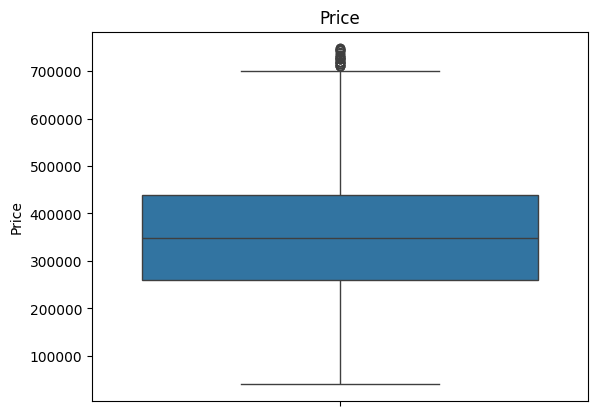

In [10]:
sns.boxplot(data=df, y='Price', orient="v").set(title='Price')

In [11]:
#df.groupby('Subtype')[['Price']].mean().astype('int64').sort_values(by='Price', ascending=False)

# Step 1: Calculate median value for each Category
category_medians = df.groupby('Subtype')['Price'].median().sort_values()

# Step 2: Get the sorted order of categories based on the median
sorted_categories = category_medians.index

print(sorted_categories)

Index(['House'], dtype='object', name='Subtype')


### loop for subplot of boxplot of numerical columns

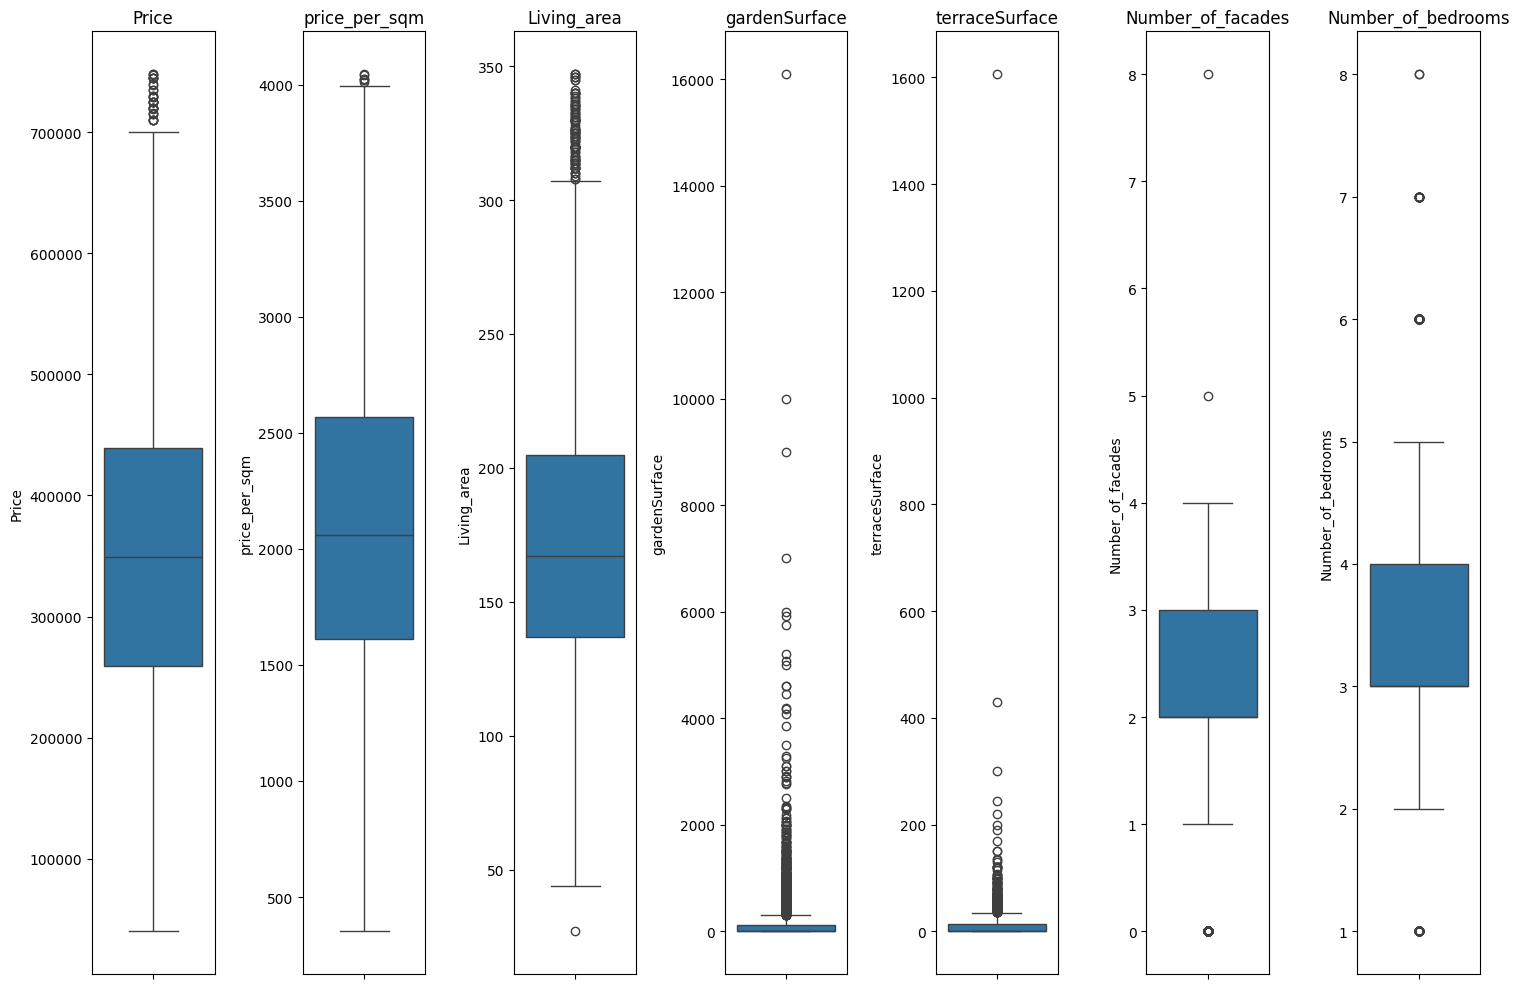

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_per_sqm','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc','Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=1, ncols=7, figsize=(15, 10))

# Flatten the ax array for easier indexing
ax = ax.ravel()

# Loop over the columns and create a scatter plot for each
for i, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, orient="v", ax=ax[i])
    ax[i].set_title(col) # Set title for each plot
    
plt.tight_layout()
plt.show()

histogram plots of the numerical categories

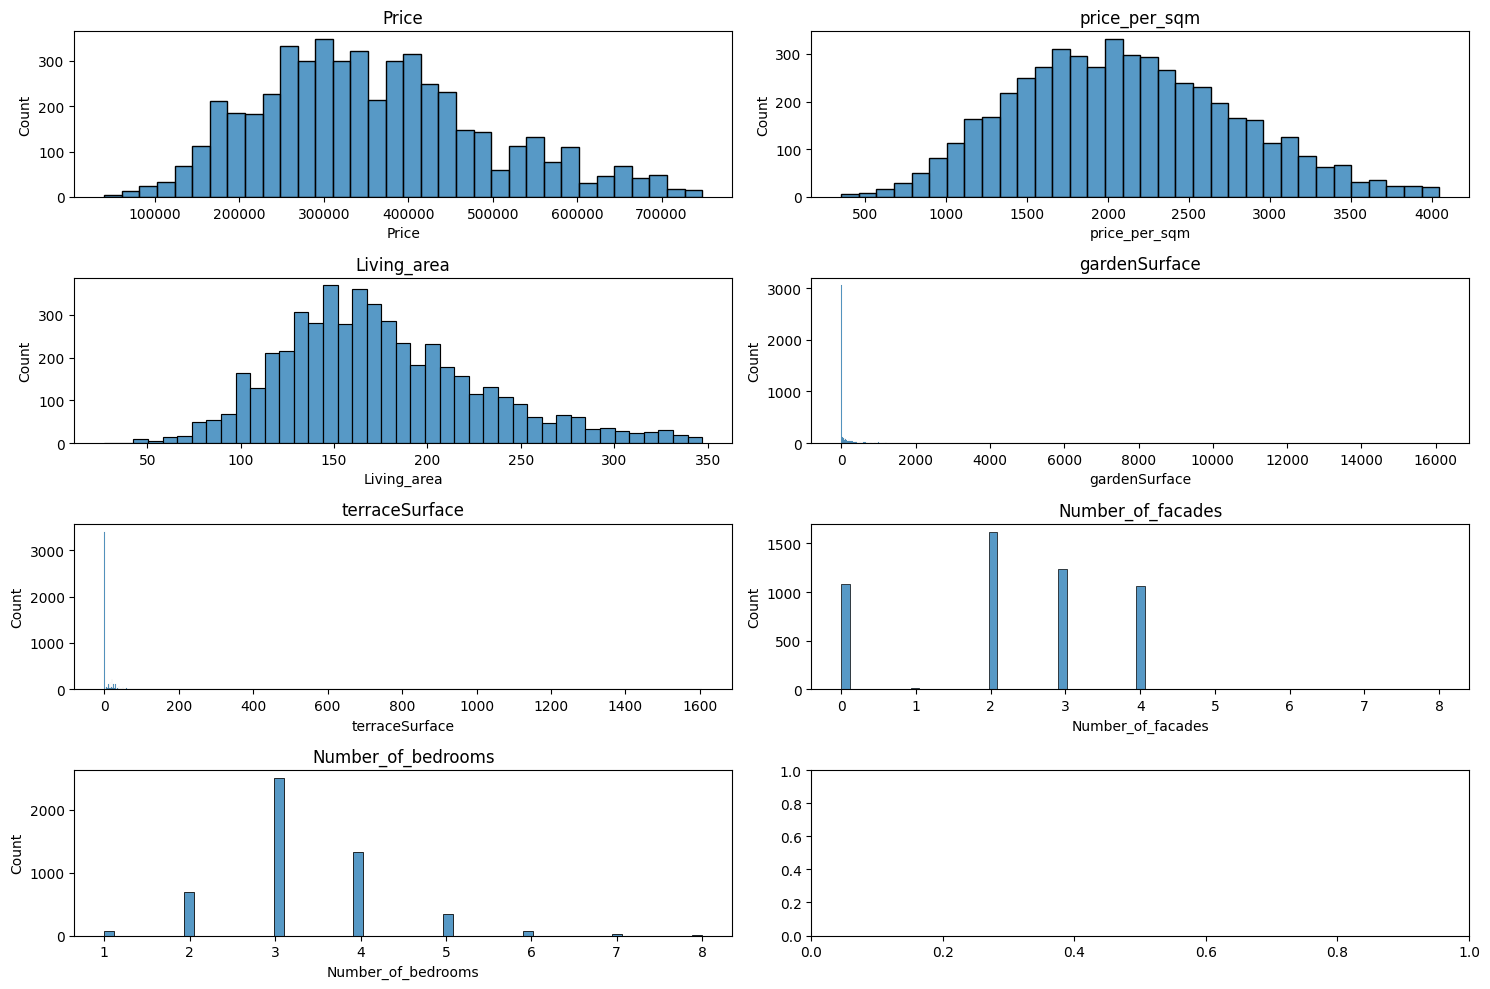

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_per_sqm','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc','Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# Flatten the ax array for easier indexing
ax = ax.ravel()

# Loop over the columns and create a scatter plot for each
for i, col in enumerate(num_cols):
    sns.histplot(data=df, x=col, ax=ax[i])
    ax[i].set_title(col) # Set title for each plot
    
plt.tight_layout()
plt.show()

BoxPlots with sorting according to median value of subgroup

Text(0.5, 1.0, 'Price')

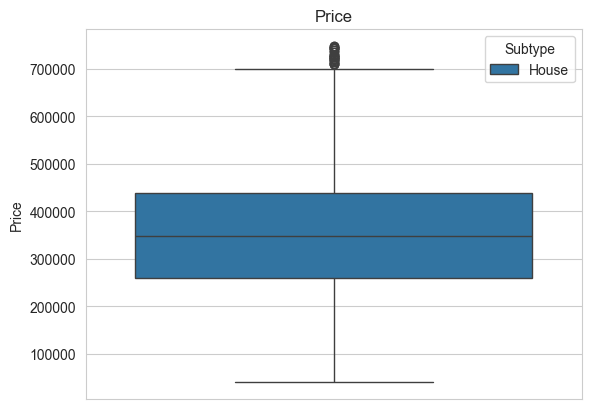

In [14]:
sns.set_style("whitegrid")
sns.color_palette("colorblind")

df.groupby('Subtype')[['Price']].mean().astype('int64').sort_values(by='Price', ascending=False)

# Step 1: Calculate the median for the category Price, grouped per subtype
medians = df.groupby(['Subtype'])['Price'].median().reset_index()

# Step 2: Sort the categories based on the median value of 'Value'
category_order = medians.groupby(['Subtype'])['Price'].median().sort_values(ascending=False).index

sns.boxplot(data=df, y='Price', hue='Subtype', hue_order=category_order, orient="v").set_title('Price')


box plots of 'Price' (numerical data), grouped according to categorical data (dataset = cleaned_data)

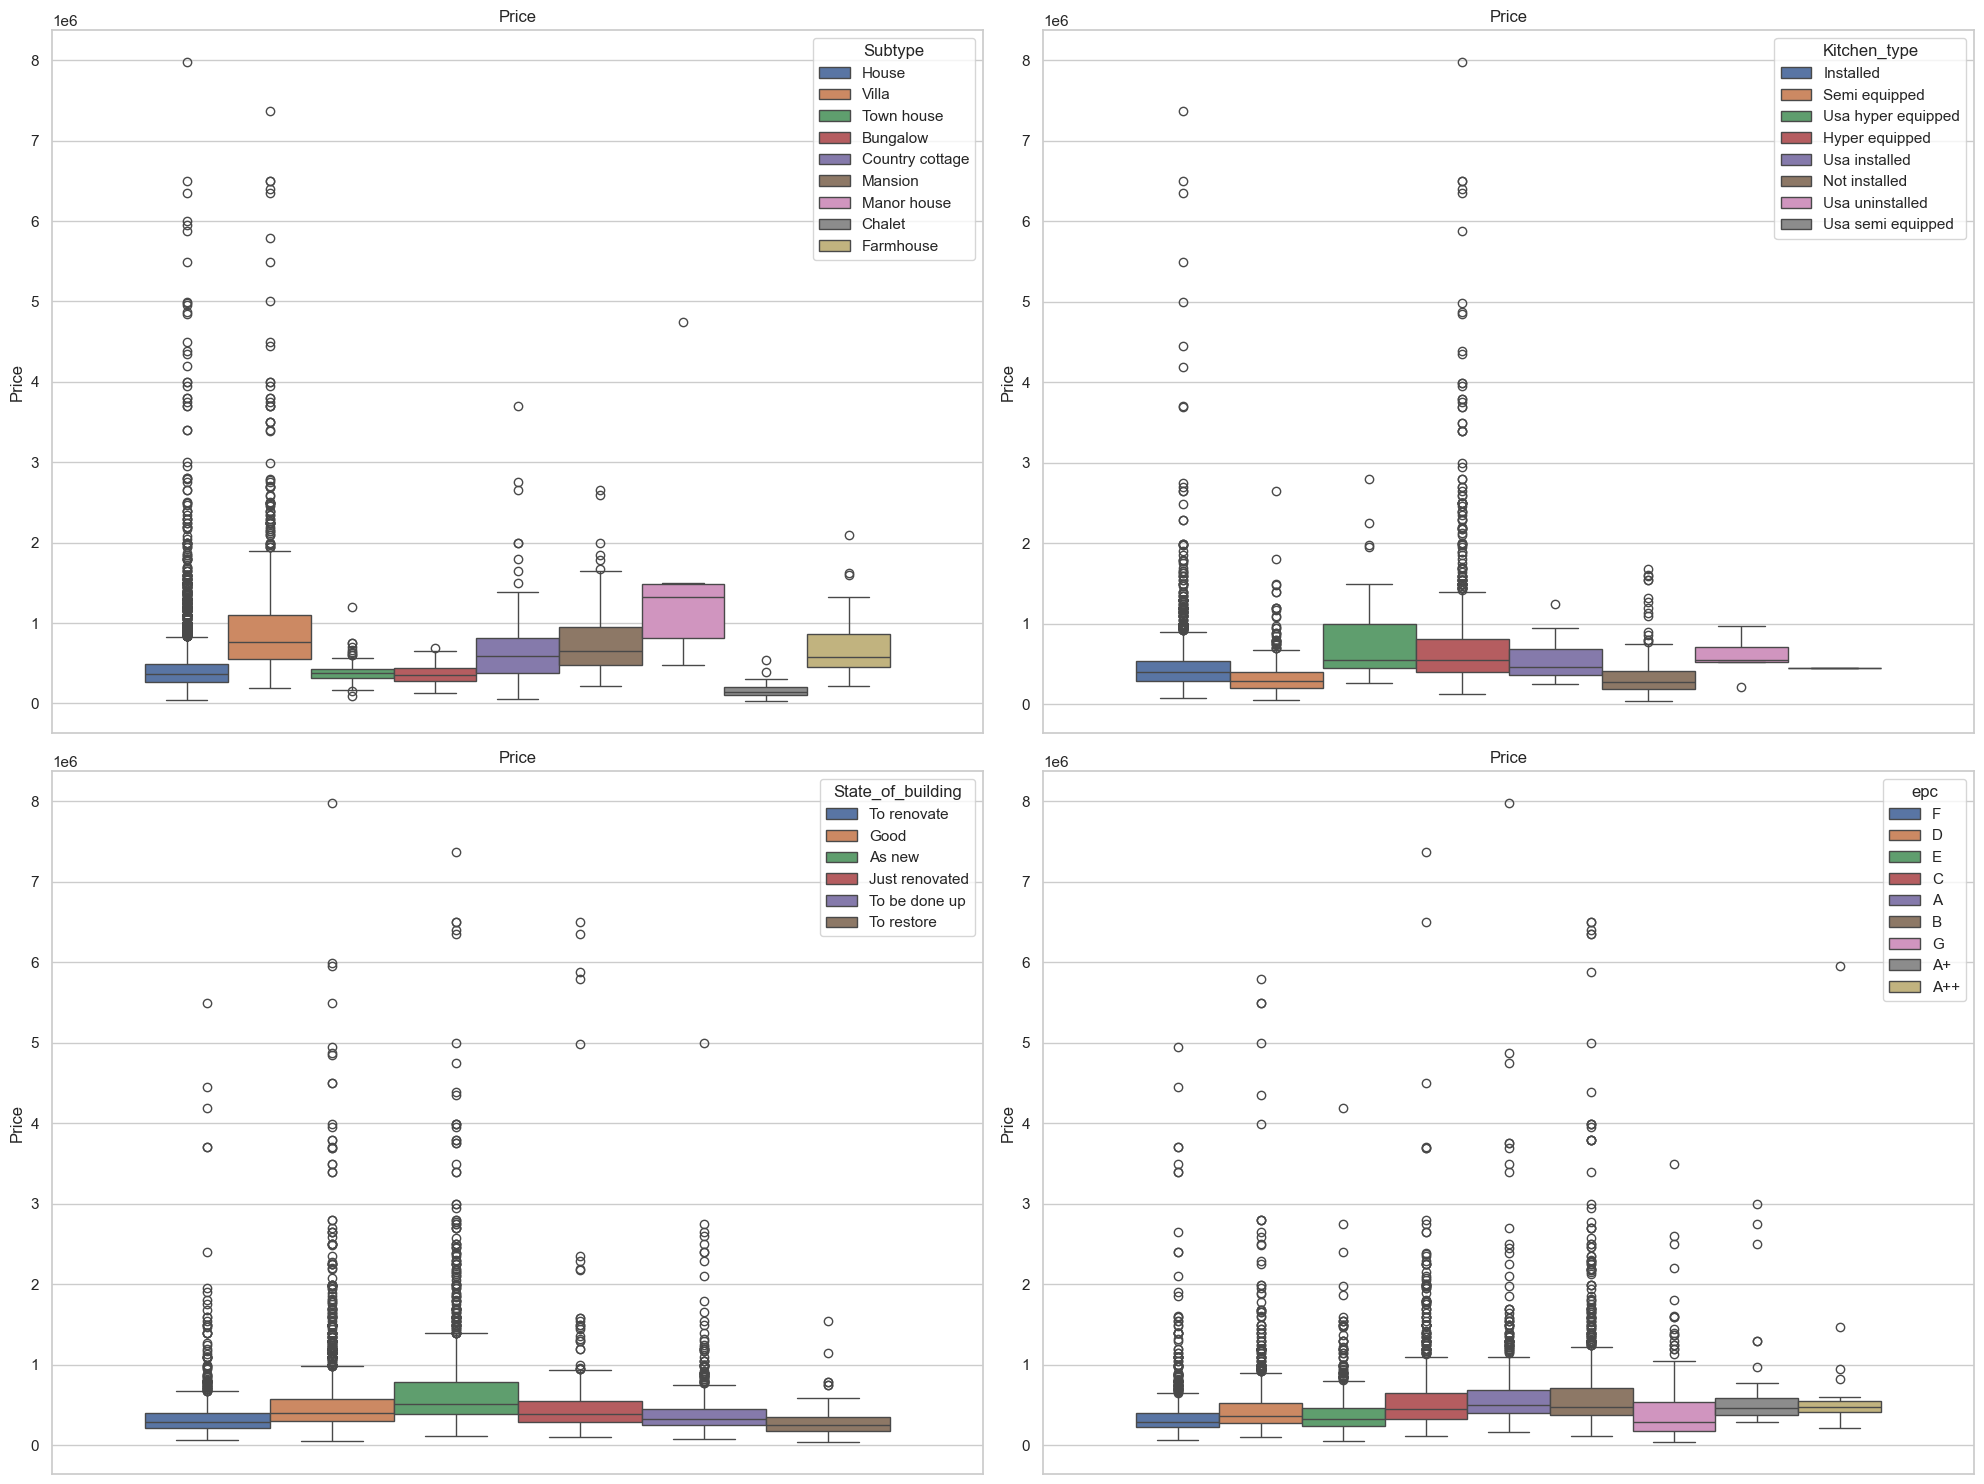

In [361]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc'] 
bin_groups = ['Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

sns.set_style("whitegrid")

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Flatten the ax array for easier indexing
ax = ax.ravel()

col = 'Price'
# Loop over the columns and create a scatter plot for each
for i, cat_grp in enumerate(cat_groups):    
    sns.boxplot(data=df, y=col, hue=cat_grp, orient="v", ax=ax[i])
    ax[i].set_title(col) # Set title for each plot

plt.tight_layout()
plt.show()



In [390]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc'] 
bin_groups = ['Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

sns.set_style("whitegrid")

# Create a figure with 7 subplots
#fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Flatten the ax array for easier indexing
ax = ax.ravel()

# Step 1: Bin the 'Postal_code' column into 9 bins (you can adjust the number of bins)
df['postal_code_bin'] = pd.cut(df['Postal_code'], bins=9, labels = ['1000', '2000', '3000', '4000', '5000', '6000', '7000', '8000', '9000'])

col = 'Price'
  
sns.boxplot(data=df, x='postal_code_bin', y=col, orient='v').set_title(col) # Set title for each plot

plt.tight_layout()
plt.show()

DTypePromotionError: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

boxplots of Price, grouped per categorical data, and sorted according to median

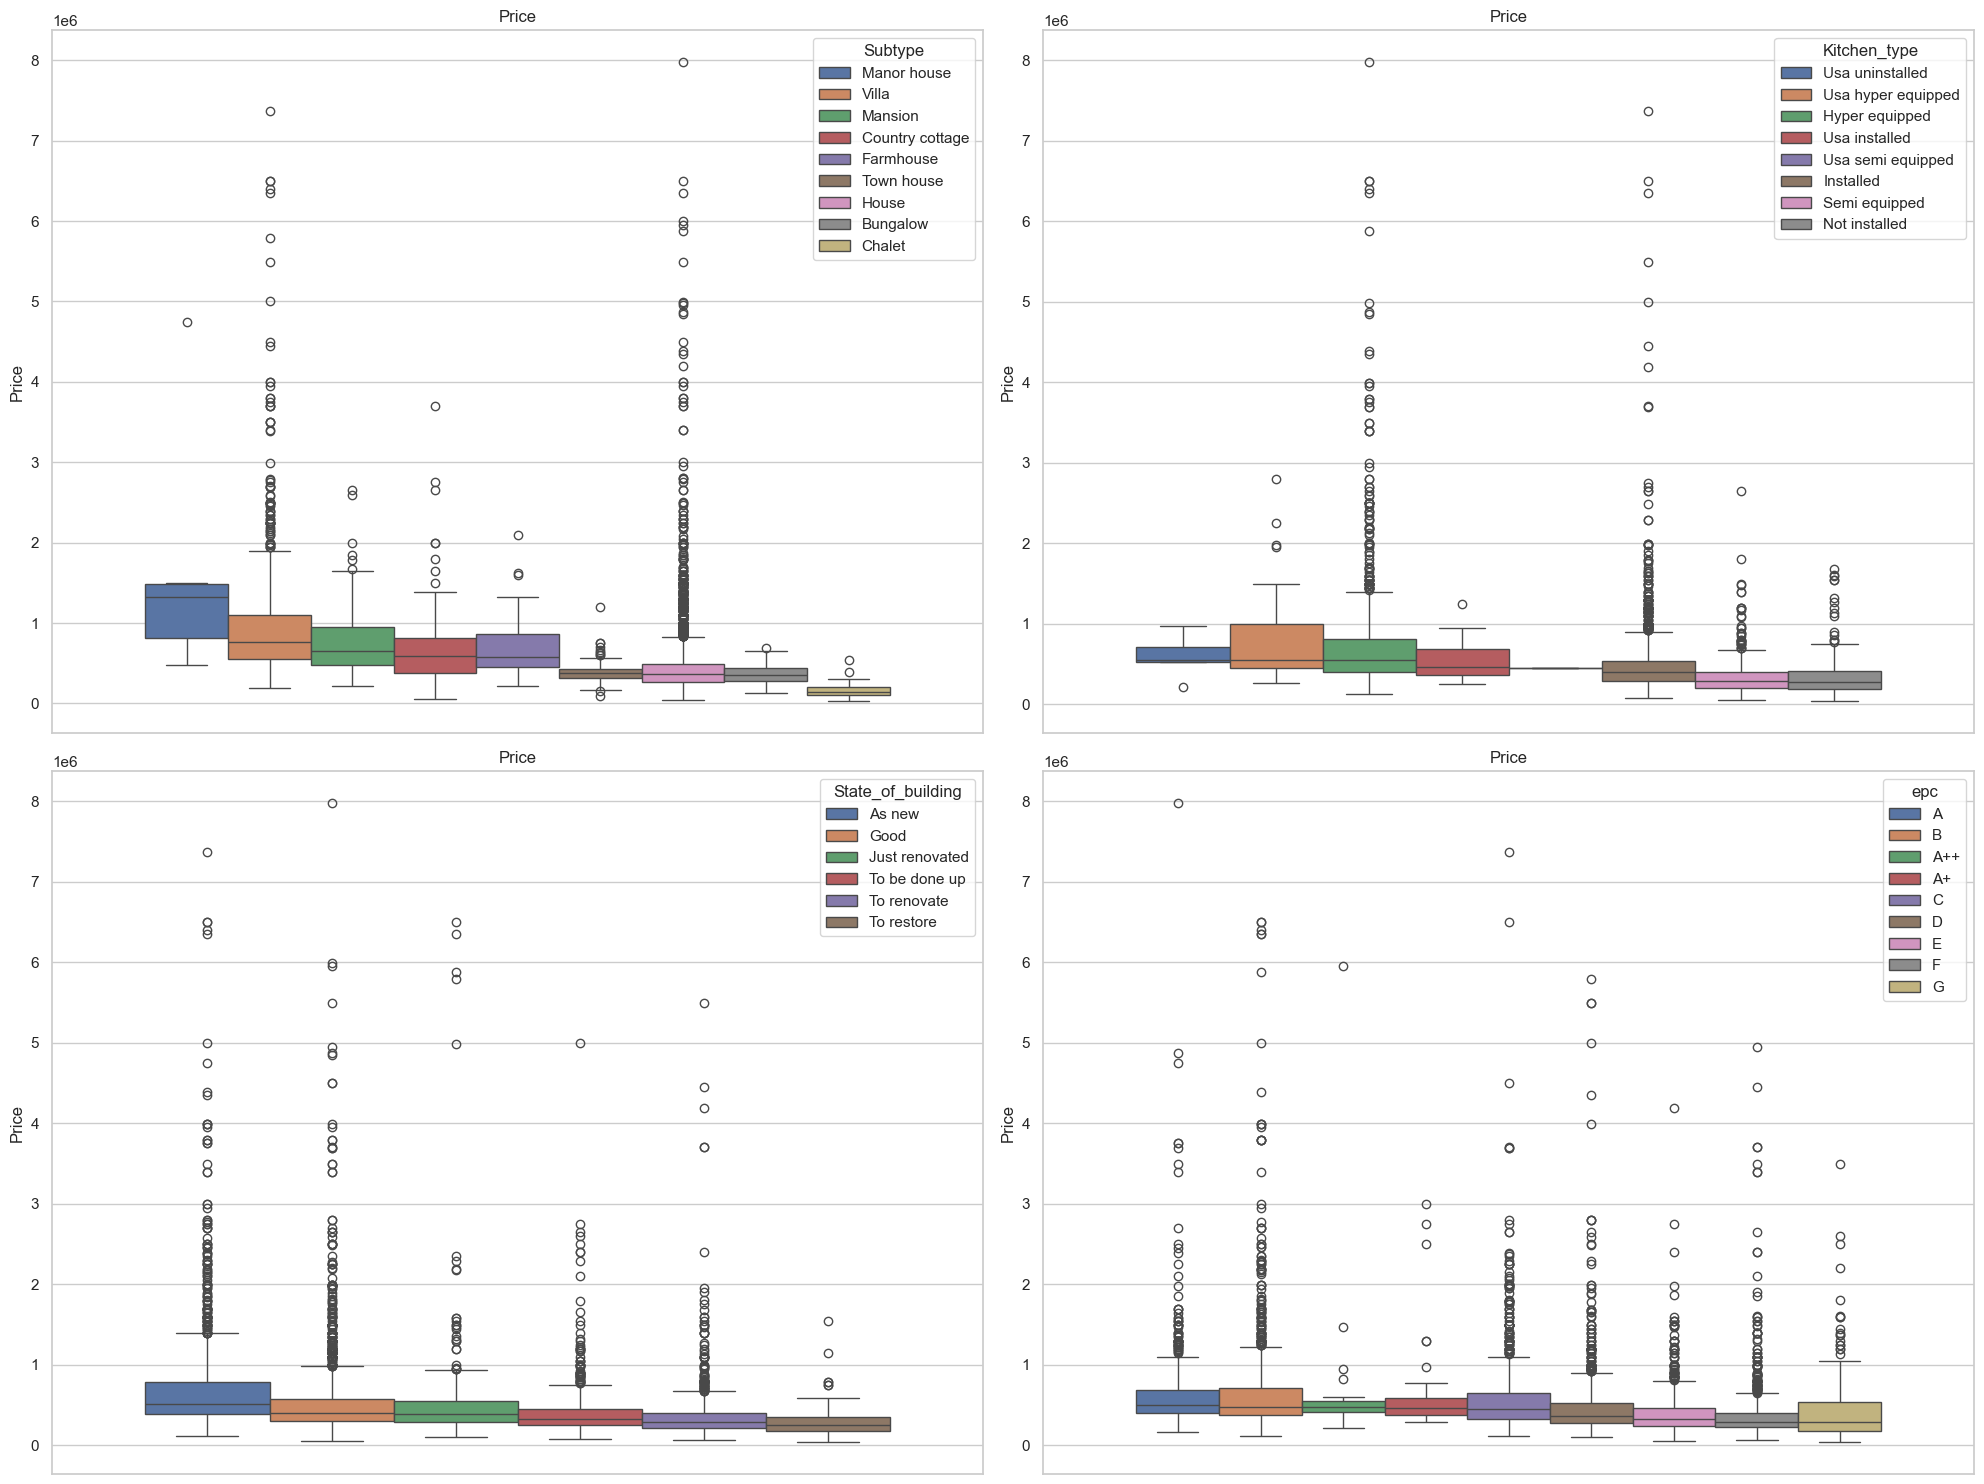

In [387]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc'] #,'Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))


# Flatten the ax array for easier indexing
ax = ax.ravel()

sns.set_style("whitegrid")
col = 'Price' # for data on Price only


# Loop over the columns and create a scatter plot for each
for i, grp in enumerate(cat_groups):    
    # Step 1: Calculate the median for the category Price, grouped per subtype
    medians = df.groupby(grp)[col].median().reset_index()

    # Step 2: Sort the categories based on the median value of 'Value'
    category_order = medians.groupby(grp)[col].median().sort_values(ascending=False).index
    
    sns.boxplot(data=df, y=col, hue=grp, hue_order=category_order, orient="v", ax=ax[i])
    ax[i].set_title(col) # Set title for each plot

plt.tight_layout()
plt.show()

box plots of 'Price' (numerical data), grouped according to boolean data (dataset = cleaned_data)

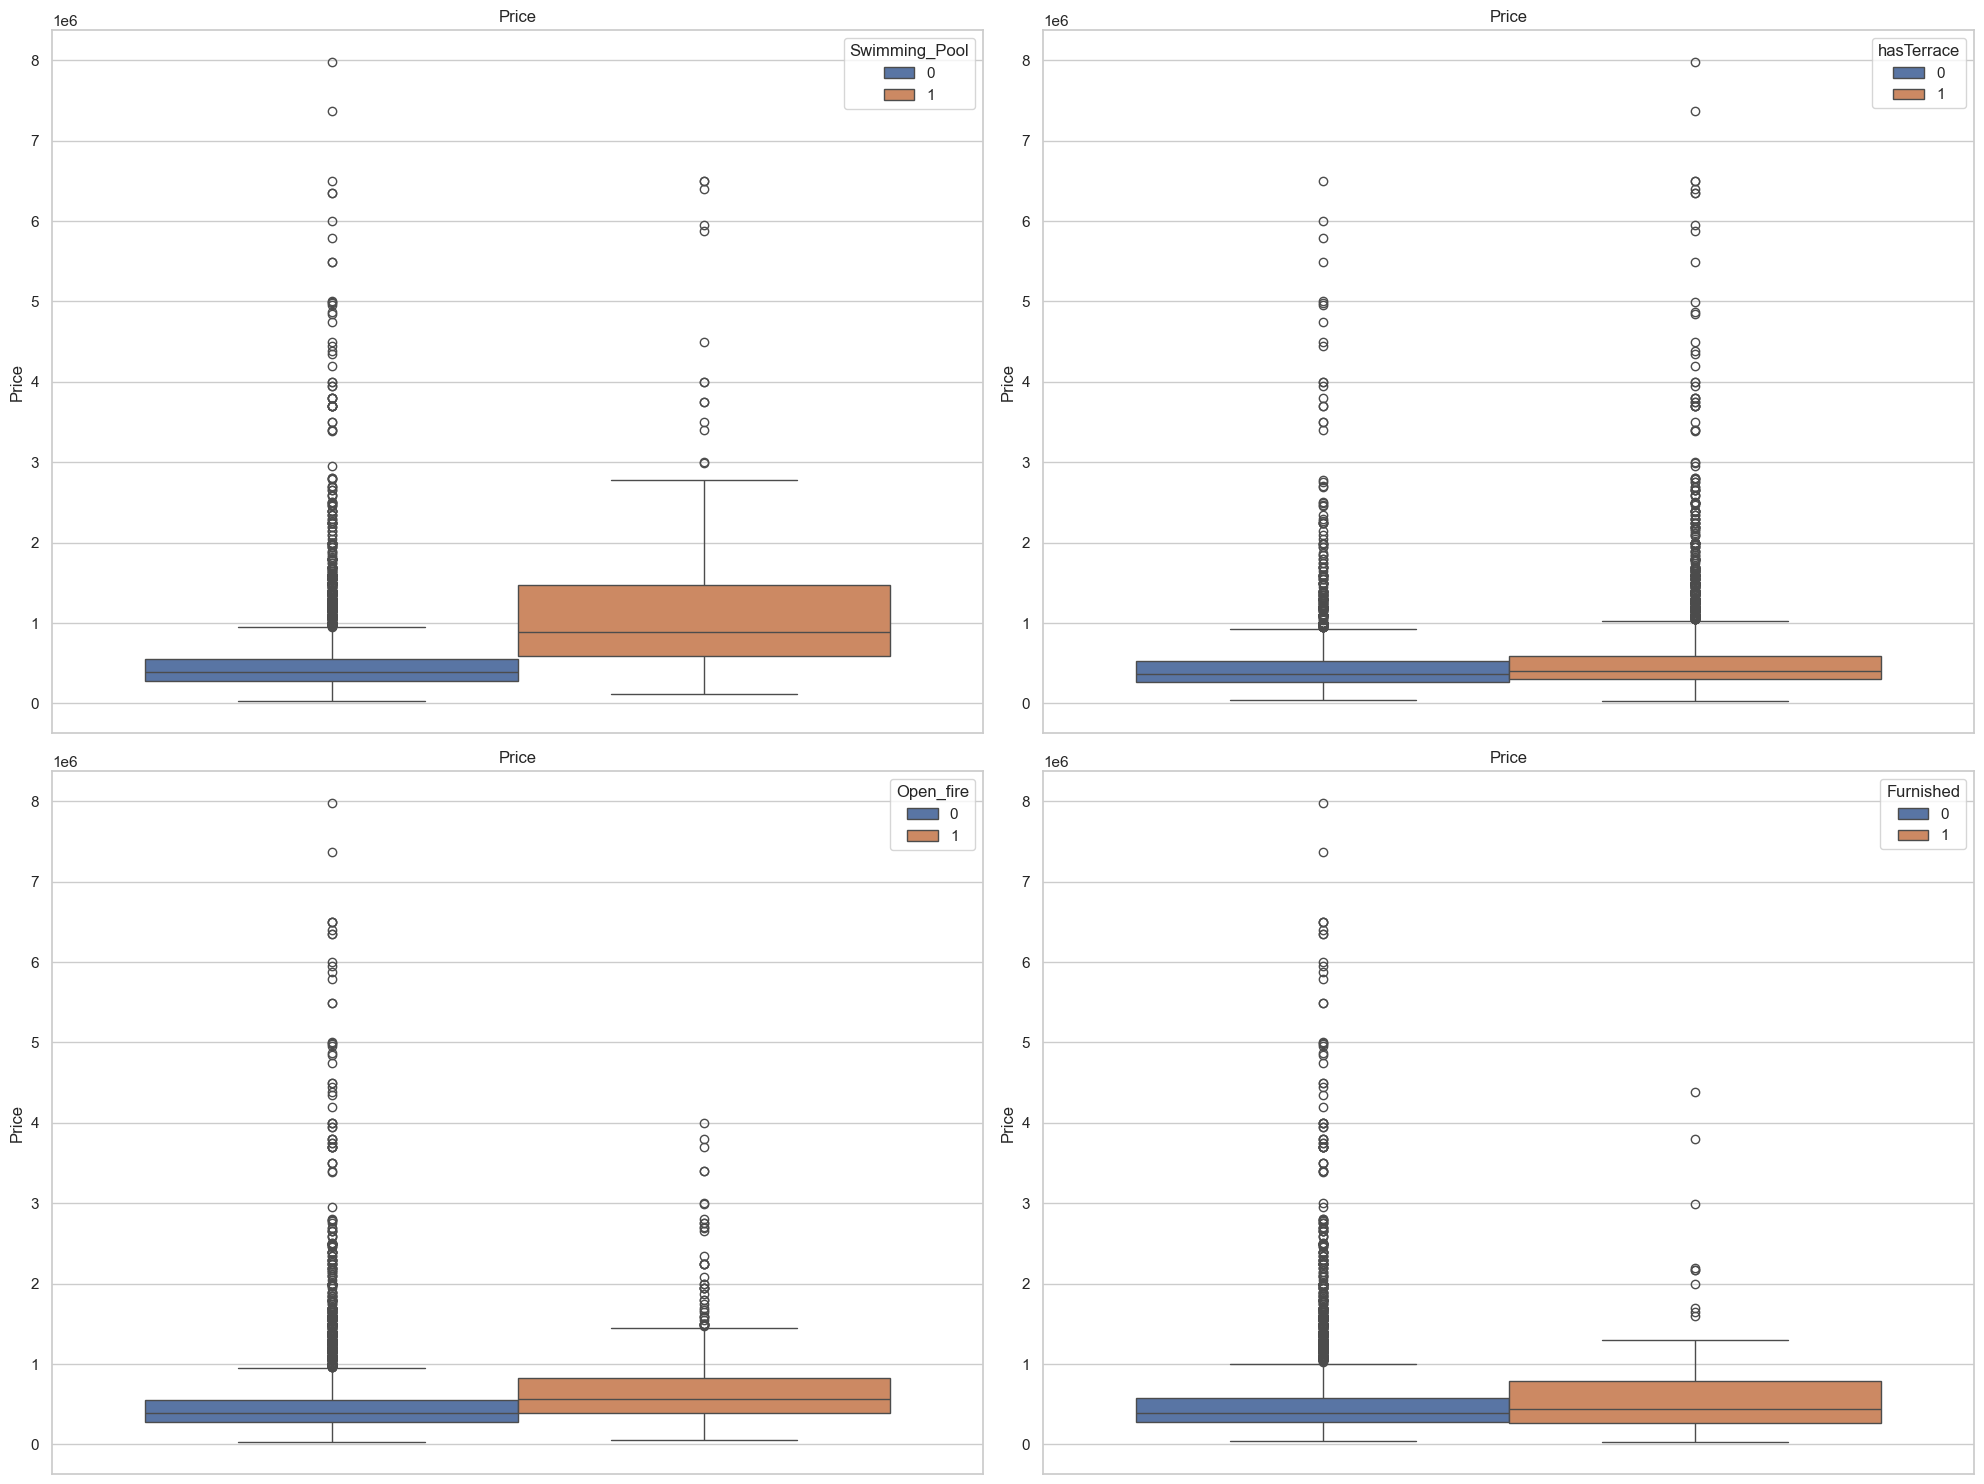

In [362]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']
cat_groups = ['Subtype','Kitchen_type','State_of_building','epc'] #,'Postal_code']
bool_groups = ['Swimming_Pool','hasTerrace','Open_fire','Furnished']

sns.set_style("whitegrid")

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))

# Flatten the ax array for easier indexing
ax = ax.ravel()

col = 'Price'
# Loop over the columns and create a scatter plot for each
for i, grp in enumerate(bool_groups):    
    sns.boxplot(data=df, y=col, hue=grp, orient="v", ax=ax[i])
    ax[i].set_title(col) # Set title for each plot

plt.tight_layout()
plt.show()


Numerical data grouped per subtype (categorical data)

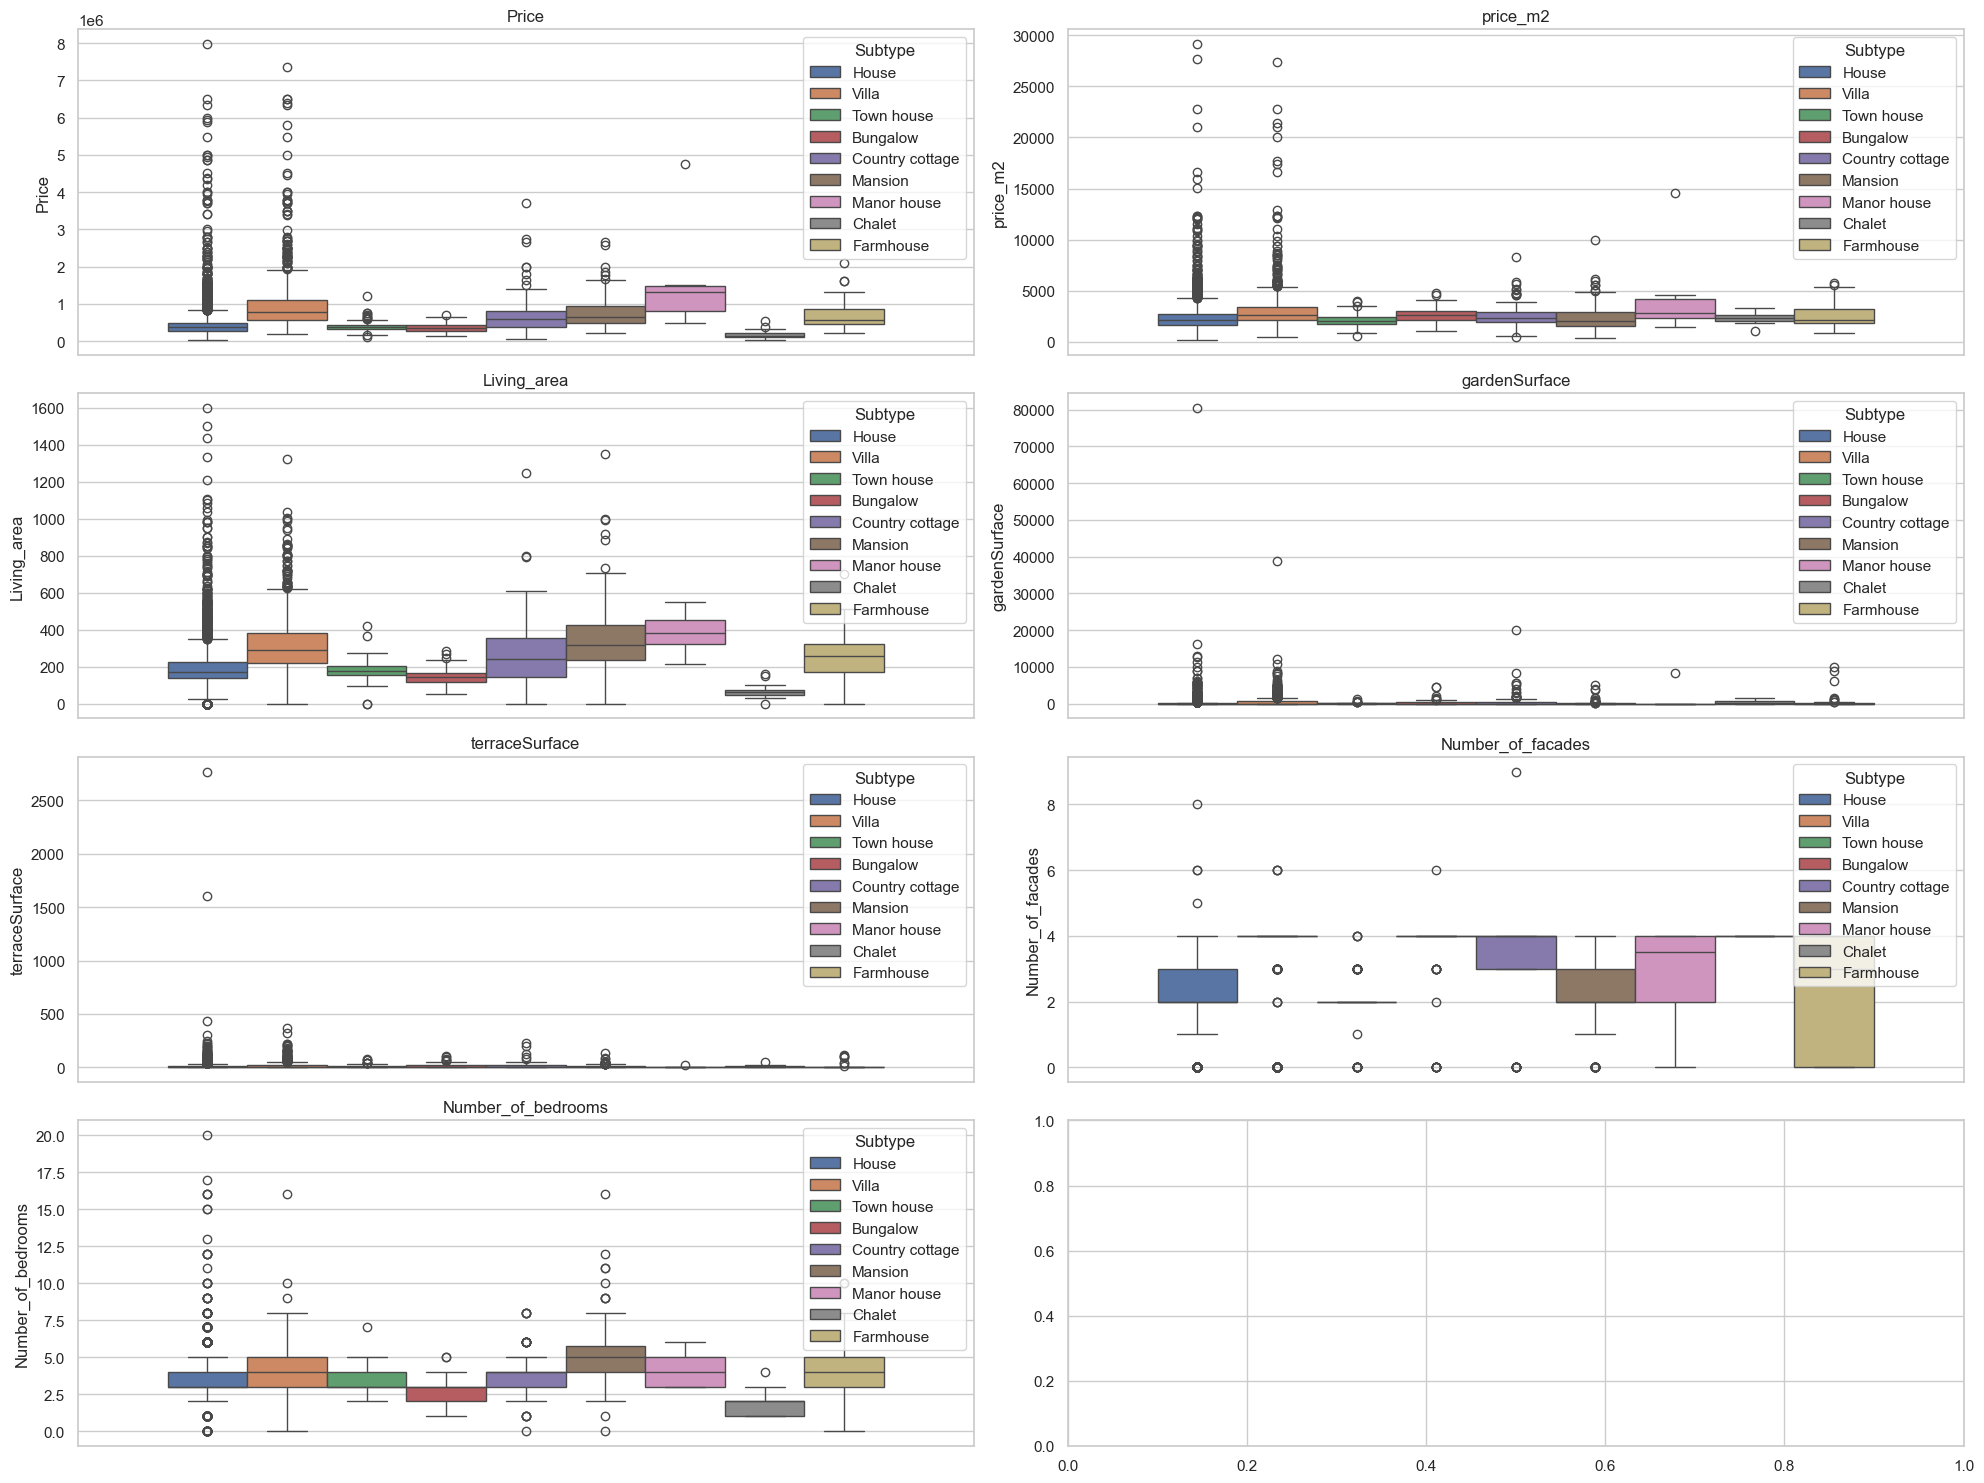

In [353]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']

sns.set_style("whitegrid")

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Flatten the ax array for easier indexing
ax = ax.ravel()

# Loop over the columns and create a scatter plot for each
for i, col in enumerate(num_cols):    
    sns.boxplot(data=df, y=col, orient="v", hue='Subtype', ax=ax[i])
    ax[i].set_title(col) # Set title for each plot
    
plt.tight_layout()
plt.show()

box plots of the numerical data, grouped boolean data 'Swimming_pool' (dataset = cleaned_data)


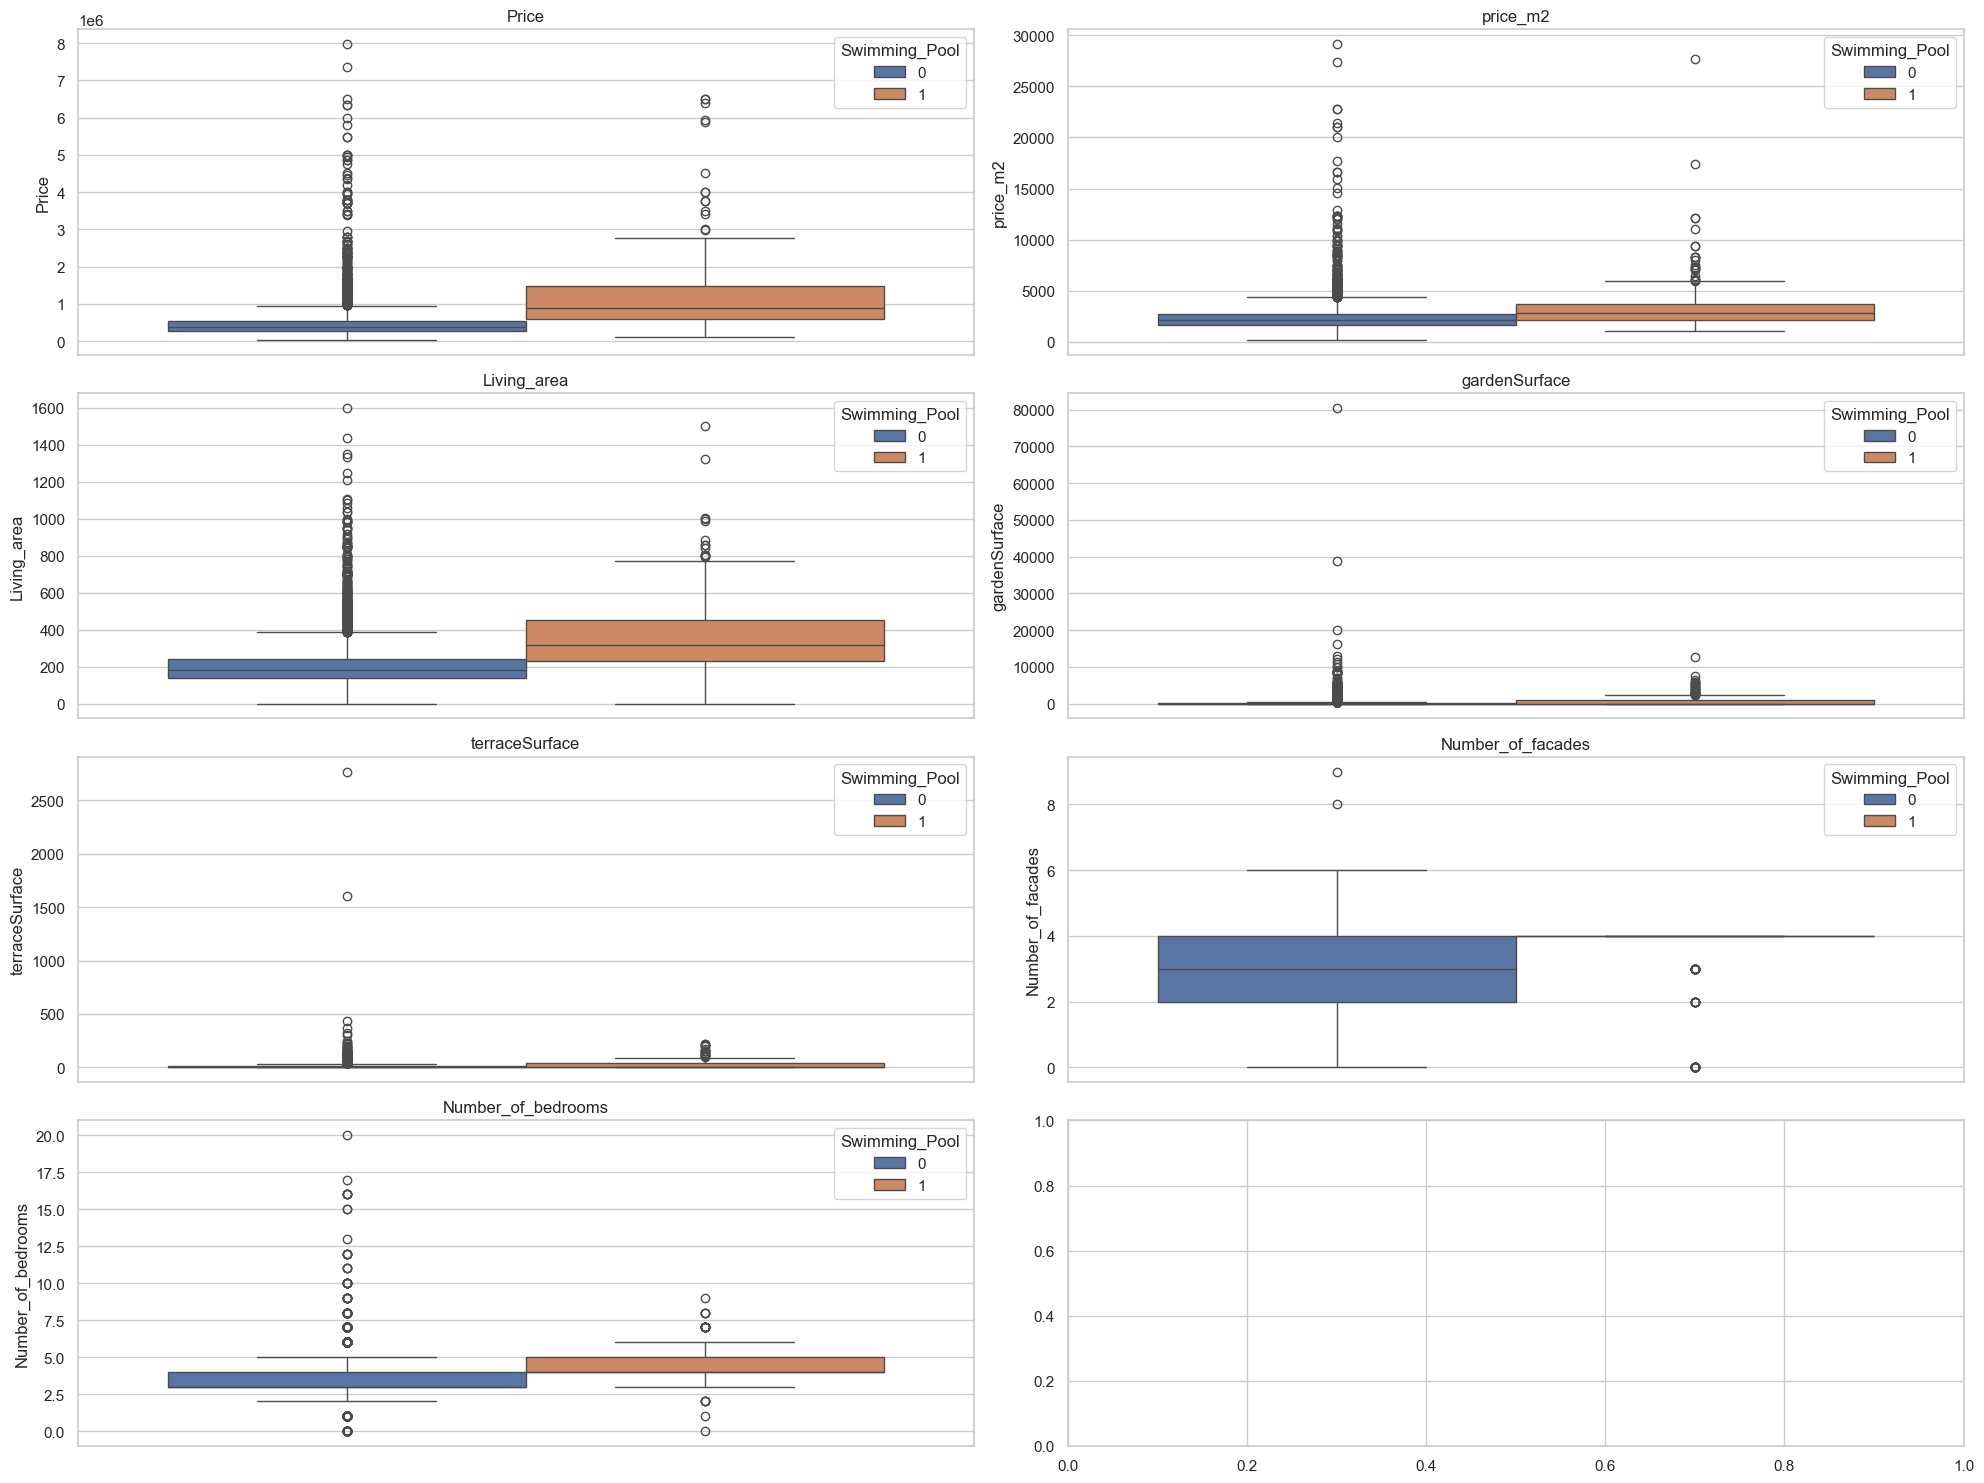

In [354]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['Price','price_m2','Living_area','gardenSurface','terraceSurface','Number_of_facades','Number_of_bedrooms']

sns.set_style("whitegrid")

# Create a figure with 7 subplots
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

# Flatten the ax array for easier indexing
ax = ax.ravel()

# Loop over the columns and create a scatter plot for each
for i, col in enumerate(num_cols):    
    sns.boxplot(data=df, y=col, orient="v", hue='Swimming_Pool', ax=ax[i])
    ax[i].set_title(col) # Set title for each plot
    
plt.tight_layout()
plt.show()

In [ ]:
# Remove outliers 6, 5, 8, 9 from 'Number_of_facades' column
#values_to_remove = [6, 5, 8, 9]
#data_scraped = data_scraped[~data_scraped['Number_of_facades'].isin(values_to_remove)]

# Outliers by 'Number Of Bedrooms' column, checked via IQR.

# In this method, we determine quartile values ​​Q1 (25th percentile) and Q3 (75th percentile) and then cal
# Outliers are those that fall outside the range [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR]

#q1 = data_scraped['Number_of_bedrooms'].quantile(0.25)
#q3 = data_scraped['Number_of_bedrooms'].quantile(0.75)
#iqr = q3 - q1

# Specifying the scope of outliners
#lower_bound = q1 - 1.5 * iqr
#upper_bound = q3 + 1.5 * iqr

# Data filtering
#data_scraped = data_scraped[(data_scraped['Number_of_bedrooms'] >= lower_bound) & 
#                             (data_scraped['Number_of_bedrooms'] <= upper_bound)]

# Display first 5 rows
#data_scraped.head()

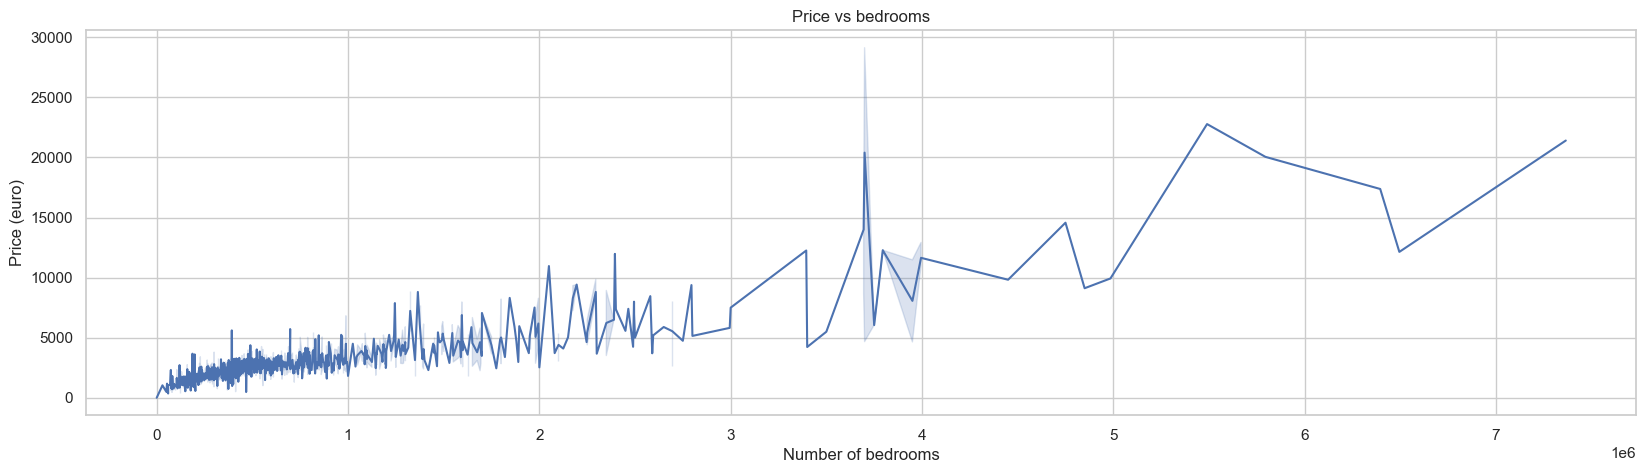

In [135]:

sns.set_style("whitegrid")

fig = plt.subplots(figsize=(20, 5))
sns.lineplot(x='Price', y='price_m2', data=df).set(title='Price vs bedrooms', xlabel='Number of bedrooms', ylabel='Price (euro)')
#sns.relplot(x='Number_of_bedrooms', y='Price', data=df, kind='line')
sns.set_theme(style='white')


In [118]:
columns = ['Price','price_m2','Living_area','gardenSurface', 'terraceSurface','Number_of_facades','Number_of_bedrooms']

for col in columns:
    print(col)
    print(round(df[col].skew()))
    print(round(df[col].mean()))
    print(round(df[col].median()))
    print(round(df[col].mode()))


Price
6
488943
389000
0    399000
Name: Price, dtype: int64
price_m2


KeyError: 'price_m2'

In [105]:
df['Price'].mean()

"""
sns.barplot(data=df, x='State_of_building', y='Price')

columns = ['Subtype','State_of_building','Kitchen_type']
for column in columns:
    print(sns.barplot(data=df, x=column))


    print(column)
    print(round(df[column].skew()))
    print(round(df[column].mean()))
    print(round(df[column].median()))
    print(round(df[column].mode()))
"""


"\nsns.barplot(data=df, x='State_of_building', y='Price')\n\ncolumns = ['Subtype','State_of_building','Kitchen_type']\nfor column in columns:\n    print(sns.barplot(data=df, x=column))\n\n\n    print(column)\n    print(round(df[column].skew()))\n    print(round(df[column].mean()))\n    print(round(df[column].median()))\n    print(round(df[column].mode()))\n"